In [99]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.cosmology import FlatLambdaCDM, FlatwCDM
from scipy.integrate import quad

In [100]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

In [101]:
%matplotlib inline

In [104]:
### Variable definitions for hubble constant, effective potential, etc...
ho = 72.5
N_eff = 3.04
O_gamma = (2.469e-5) ### Radiation term, constant
h = ho/100.0
O_R = O_gamma * (1.0 / (h**2.0)) * (1.0 + (0.2271)*N_eff)
c = 299792.458 #km/s
alpha = 1 * (c / ho)
log = True

In [105]:
### ov is a given dark energy constant, and om is a given matter constant
### NCr, NCk are constants used to nullify parametric densities for certain models, i.e. Omega_rad * NCr = 0

### List of models put into an array called 'modeler'
# model, om, ov, NCr, NCk = 'Einstein de-Sitter', 1.0, 0.0, 0.0, 1.0
# model, om, ov, NCr, NCk = 'Low Density', .05, 0.0, 1.0, 1.0
# model, om, ov, NCr, NCk = 'High Lambda', 0.2, 0.8, 1.0, (0.0)
# model, om, ov, NCr, NCk = 'O_m = .1, Omega_lamda = .9', 0.1, 0.9, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .2, Omega_lamda = .8', 0.2, 0.8, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .3, Omega_lamda = .7', 0.3, 0.7, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .4, Omega_lamda = .6', 0.4, 0.6, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .5, Omega_lamda = .5', 0.5, 0.5, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .6, Omega_lamda = .4', 0.6, 0.4, 1.0, (0.)

In [106]:
modeler = [('Einstein de-Sitter', 1.0, 0.0, 0.0, 1.0, -1.),('Low Density', .05, 0.0, 1.0, 1.0, -1.),
('High Lambda', 0.2, 0.8, 1.0, (0.0), -1.),('O_m = .1, Omega_lamda = .9', 0.1, 0.9, 1.0, (0.), -1.),
('O_m = .2, Omega_lamda = .8', 0.2, 0.8, 1.0, (0.), -1.),('O_m = .3, Omega_lamda = .7', 0.3, 0.7, 1.0, (0.), -1.),
('O_m = .4, Omega_lamda = .6', 0.4, 0.6, 1.0, (0.), -1.),('O_m = .5, Omega_lamda = .5', 0.5, 0.5, 1.0, (0.), -1.),
('O_m = .6, Omega_lamda = .4', 0.6, 0.4, 1.0, (0.), -1.),('test_w1', 0.3, 0.7, 0.0, 0.0, -.9), 
           ('test_w2', 0.3, 0.7, 0.0, 0., -1.0),('test_w3', 0.3, 0.7, 0.0, 0., -1.1)]

print (modeler)
print (modeler[6][2])

[('Einstein de-Sitter', 1.0, 0.0, 0.0, 1.0, -1.0), ('Low Density', 0.05, 0.0, 1.0, 1.0, -1.0), ('High Lambda', 0.2, 0.8, 1.0, 0.0, -1.0), ('O_m = .1, Omega_lamda = .9', 0.1, 0.9, 1.0, 0.0, -1.0), ('O_m = .2, Omega_lamda = .8', 0.2, 0.8, 1.0, 0.0, -1.0), ('O_m = .3, Omega_lamda = .7', 0.3, 0.7, 1.0, 0.0, -1.0), ('O_m = .4, Omega_lamda = .6', 0.4, 0.6, 1.0, 0.0, -1.0), ('O_m = .5, Omega_lamda = .5', 0.5, 0.5, 1.0, 0.0, -1.0), ('O_m = .6, Omega_lamda = .4', 0.6, 0.4, 1.0, 0.0, -1.0), ('test_w1', 0.3, 0.7, 0.0, 0.0, -0.9), ('test_w2', 0.3, 0.7, 0.0, 0.0, -1.0), ('test_w3', 0.3, 0.7, 0.0, 0.0, -1.1)]
0.6


In [107]:
### Build a dictionary of models
models = {}

for x in modeler:
    model = x[0]
    om = x[1]
    ov = x[2]
    NCr = x[3]
    NCk = x[4]
    w = x[5]
    new_key = model
    new_value = (om, ov, NCr, NCk, w)
    models[new_key]=new_value
print (models)

### Build a csv file containing model information for easier calling
# import csv

# csv_filename = 'models.csv'
# with open('models.csv','w') as x:
#     writer = csv.writer(x)
#     writer.writerow(["Model","O_m","O_lambda","NCr","NCk", "omega"])
#     for key, value in models.items():
#         b = models[key]
#         writer.writerow([key,b[0],b[1],b[2],b[3]])

{'Einstein de-Sitter': (1.0, 0.0, 0.0, 1.0, -1.0), 'Low Density': (0.05, 0.0, 1.0, 1.0, -1.0), 'High Lambda': (0.2, 0.8, 1.0, 0.0, -1.0), 'O_m = .1, Omega_lamda = .9': (0.1, 0.9, 1.0, 0.0, -1.0), 'O_m = .2, Omega_lamda = .8': (0.2, 0.8, 1.0, 0.0, -1.0), 'O_m = .3, Omega_lamda = .7': (0.3, 0.7, 1.0, 0.0, -1.0), 'O_m = .4, Omega_lamda = .6': (0.4, 0.6, 1.0, 0.0, -1.0), 'O_m = .5, Omega_lamda = .5': (0.5, 0.5, 1.0, 0.0, -1.0), 'O_m = .6, Omega_lamda = .4': (0.6, 0.4, 1.0, 0.0, -1.0), 'test_w1': (0.3, 0.7, 0.0, 0.0, -0.9), 'test_w2': (0.3, 0.7, 0.0, 0.0, -1.0), 'test_w3': (0.3, 0.7, 0.0, 0.0, -1.1)}


In [108]:
# terms = [z, om, ov, w, ho, NCr, NCk, log] ### can input all values as "function_name(*terms)"

In [295]:
### Defining Functions

### OM returns the z dependent matter density function, om is the matter density constant
def OM(z, om):
    return om * (1.0 + z)**3.0

### OR returns the z dependent radiation function, O_R is the radiation density constant
### O_R = NCr * O_gamma * (1.0 / (h**2.0)) * (1.0 + (0.2271)*N_eff)
# print (O_R)
def OR(z, ho, NCr):
    return NCr * O_R * (1 + z)**4.0

### Ok returns the z dependent curvature function, O_k is the curvature density constant, 
def Ok(z, om, ov, ho, NCk):
    O_k = 1 - om - ov - O_R
    return NCk * O_k * (1 + z)**2.0

### O_de returns a list matching size of z array (for density evolution plot)
def O_de(z, ov):
    lamd = []
    for x in z:
        lamd.append(ov)
    return lamd

### Returns the z dependent function of dark energy density 
def O_de2(z, ov, w):
        return ov * (1 + z)**(3*(1 + w))
    
### Returns a function for E(z)    
def E_of_z(z, om, ov, w, ho, NCr, NCk):
    matter = OM(z, om)
    radiation = OR(z, ho, NCr)
    curvature = Ok(z, om, ov, O_R, NCk)
    dark_energy = O_de2(z, ov, w)
    
    E_squared = matter + radiation + curvature + dark_energy
    return np.sqrt(E_squared)

### Returns an integratable function of 1 /E(z)
def E_int(z, om, ov, w, ho, NCr, NCk):
    ups = (1/(E_of_z(z, om, ov, w, ho, NCr, NCk)))
    return ups

### Returns the luminosity distance or the distance modulus, if the log = False,True respectively
def luminosity_distance(z, om, ov, w, ho, NCr, NCk, log):
    integral = np.empty_like(z)
    for i, u in enumerate(z):
        integral[i] = quad(E_int, 0., u, args = (om, ov, w, ho, NCr, NCk))[0]
    lum_dist = (1 + z) * c * integral * (1 / ho)
    if log:
        return 5 * np.log10(lum_dist) + 25
    else:
        return lum_dist
    
def diam_dist(z, om, ov, w, ho, NCr, NCk, log):
    lum = luminosity_distance(z, om, ov, w, ho, NCr, NCk, log)
    ang = lum/(1 + z)**2
    return ang

Point of Intersection: z = 2517.8339920499343
3196160885.227991


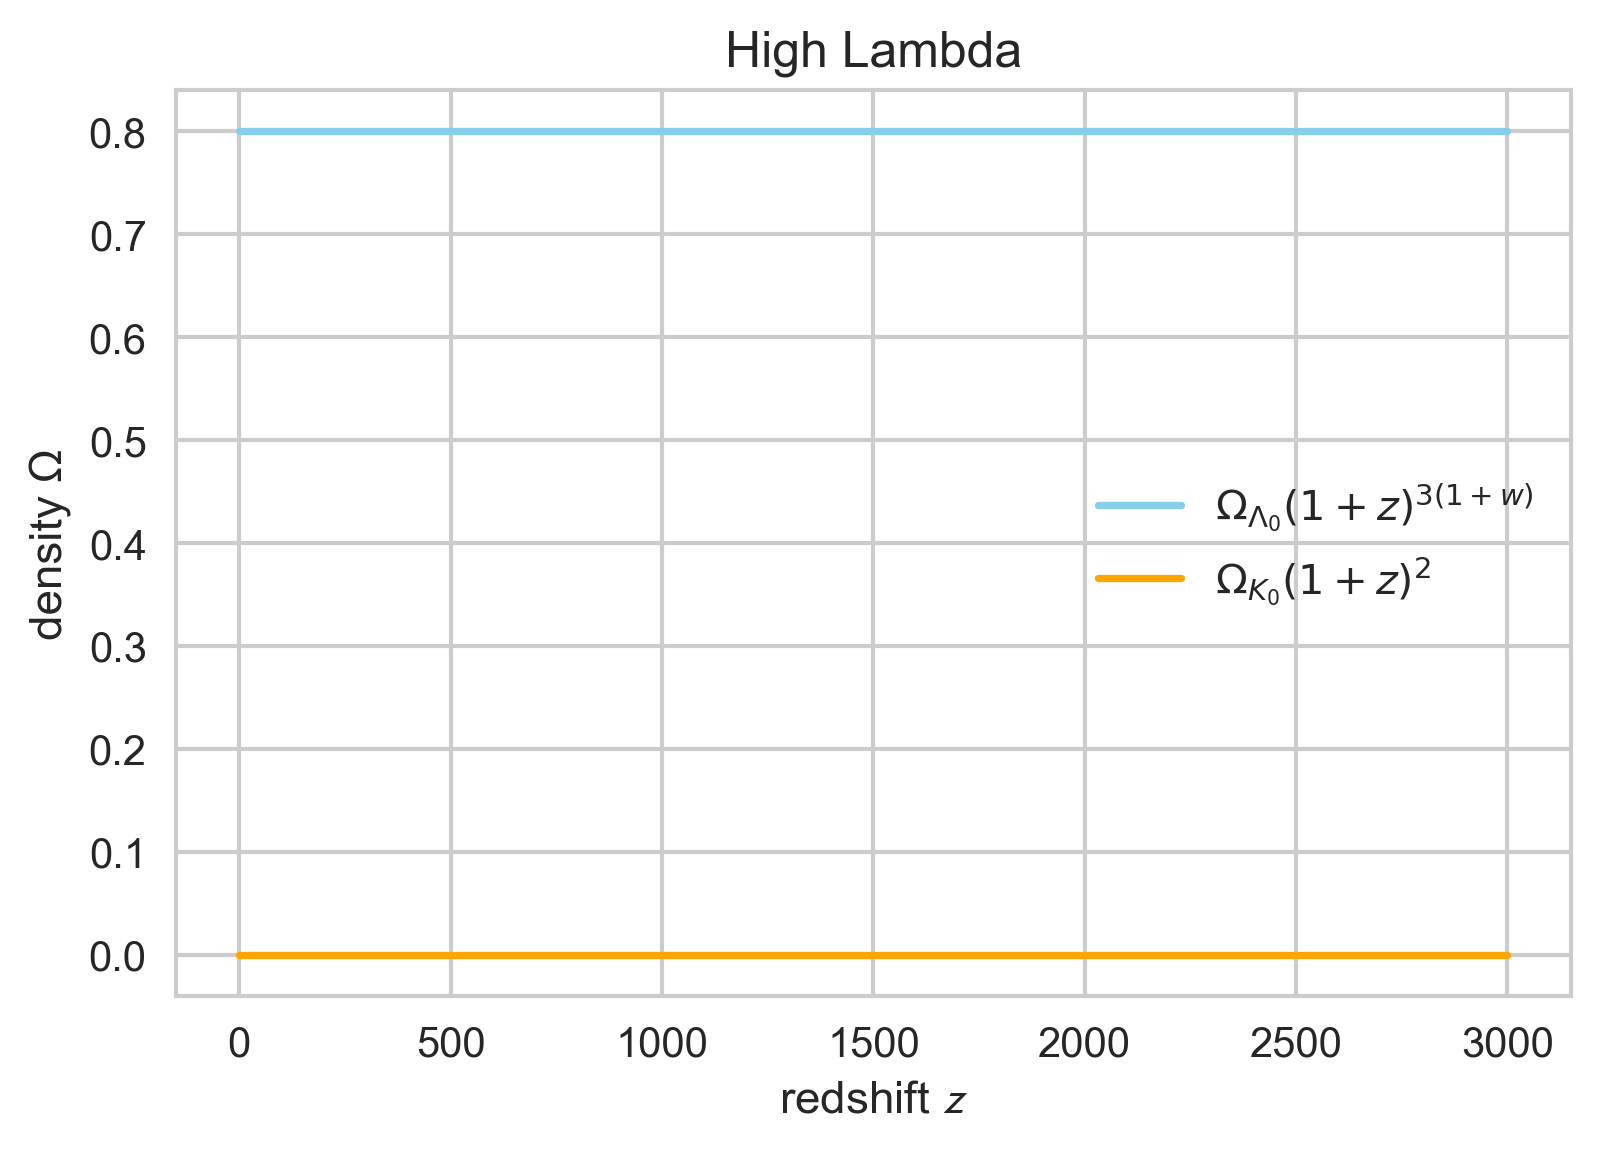

In [114]:
### Plotting Density evolution of a particular model
z = np.linspace(0,3000,50)


for key in models:
      
    O_matter = models[key][0]
    O_lambder = models[key][1]
    omega = models[key][4]
    NCr = models[key][2]
    NCk = models[key][3]
    
    matter = OM(z, O_matter)
    curvature = Ok(z, O_matter, O_lambder, O_R, NCk)
    radiation = OR(z, ho, NCr)
    dark_e = O_de2(z, O_lambder, omega)
    
    ### Calculate where matter and radiation densities intersect
    Intersect = (O_matter/O_R) - 1
    
    ### Value of OM at the redshift of 
    Omega_alpha = OM(Intersect, O_matter)
    ### Temp variable for z = np.linspace function
#     v = Intersect + 500
#     z = np.linspace(0,3000,50)
    
    if 'High' in key:
#         plt.plot(z, matter, label = r'$\Omega_{M_0}$' + r'$(1 + z)^3$', color = 'r')
        plt.plot(z, dark_e, label =  r'$\Omega_{\Lambda_0}$' + r'${(1 + z)}^{3(1 + w)}$', color = 'skyblue')
#         plt.plot(z, radiation, label = r'$\Omega_{R_0}$' + r'$(1+z)^4$')
        plt.plot(z, curvature, label = r'$\Omega_{K_0}$' + r'$(1+z)^2$', color = 'orange')
        
#         plt.plot(z, matter, label = (float(O_matter),r'$(1 + z)^3$'), color = 'r')
#         plt.plot(z, dark_e, label =  (float(O_lambder), r'${(1 + z)}^{3(1 + w)}$'), color = 'skyblue')
#         plt.plot(z, radiation, label = (float(O_R),r'$(1+z)^4$'))
#         plt.plot(z, curvature, label = (float(curvature), r'$(1+z)^2$'), color = 'orange')
        
        plt.title(key)

        print ('Point of Intersection: z = {}'.format(Intersect))
        print (Omega_alpha)
        
### Plot the dark e evolution for different values of w    
#     if 'test_w1' in key:
#         plt.plot(z, dark_e, label = omega, color = 'skyblue')
#     if 'test_w2' in key:
#         plt.plot(z, dark_e, label = omega, color = 'r')
#     if 'test_w3' in key:
#         plt.plot(z, dark_e, label = omega, color = 'b')        
#         plt.title('dark energy density evolution, w = -.9, -1., -1.1')

plt.legend()
plt.ylabel('density Ω')
plt.xlabel('redshift ' + r'$\mathcal{z}$')

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300

1258.4169960249671 199760055.32674944
2517.8339920499343 3196160885.227991
3777.2509880749008 16180564481.466694
5036.667984099869 51138574163.64786
6296.084980124835 124850034579.21834
3777.2509880749008 16180564481.466694
3777.2509880749008 16180564481.466694
3777.2509880749008 16180564481.466694


Text(0.5,1,'Redshift of Matter-Radiation Equality')

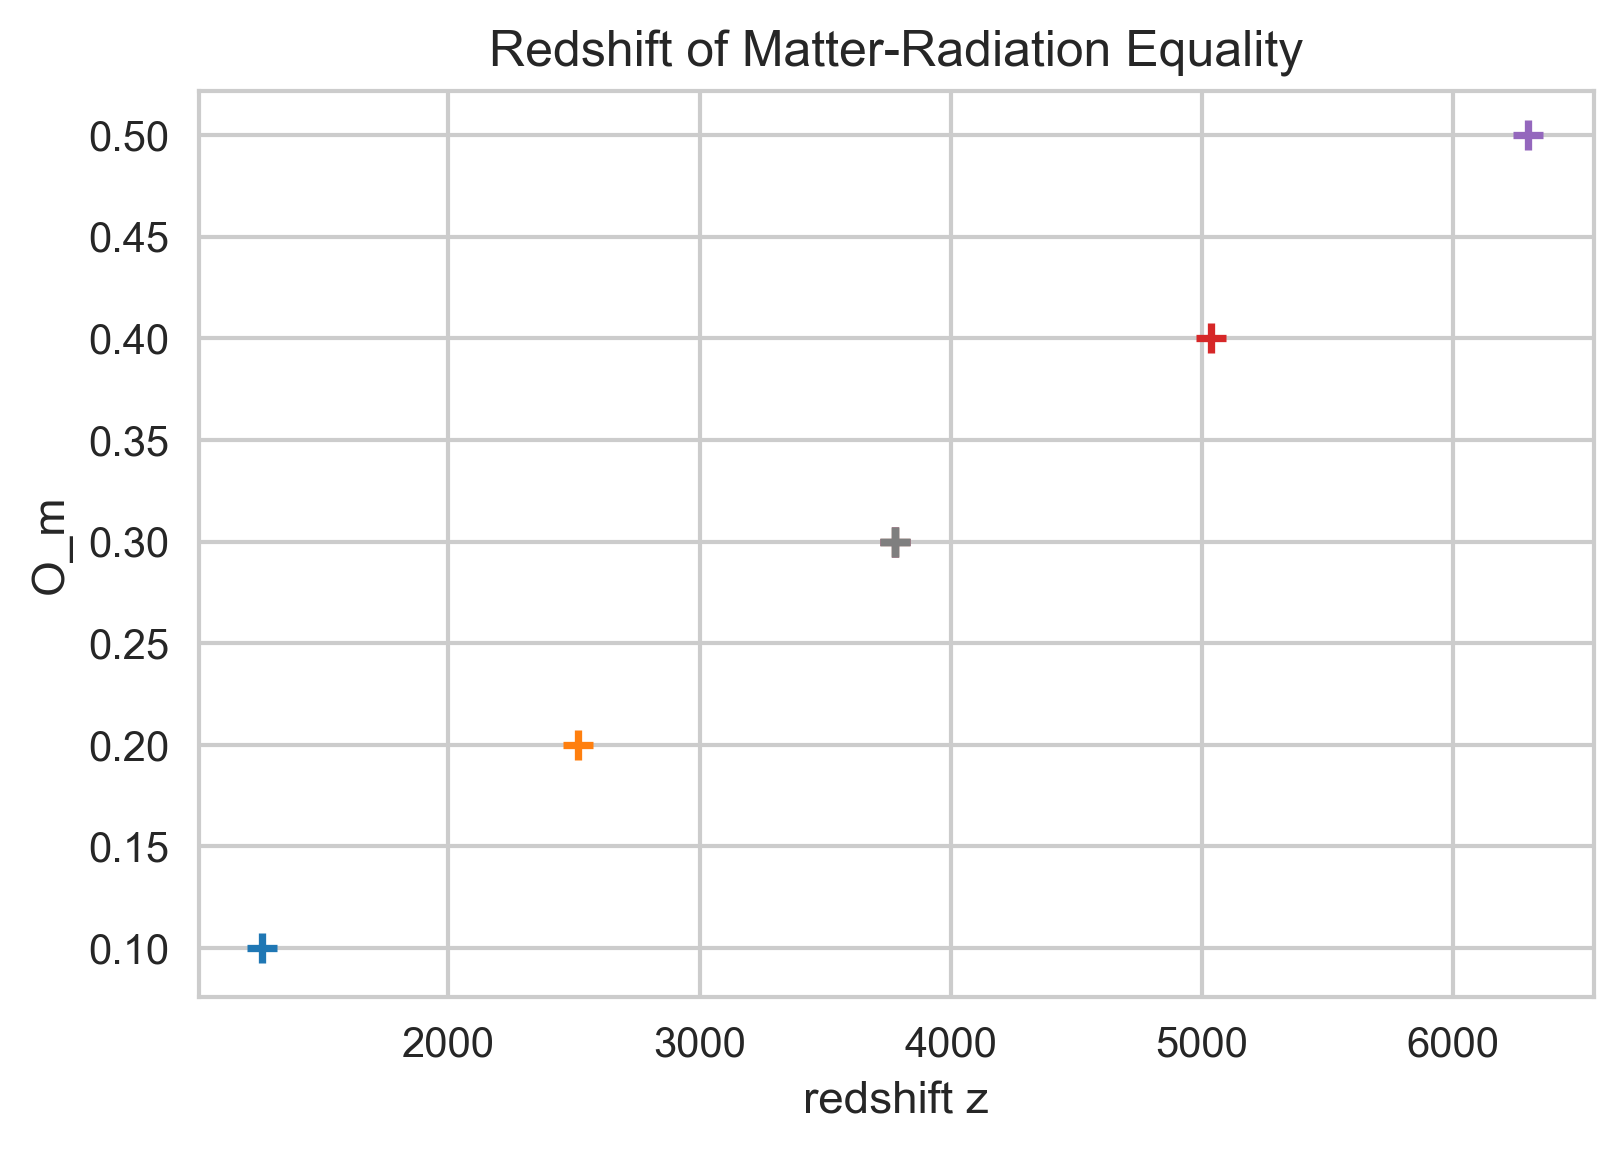

In [1356]:
### Plot of values at points of intersection

for key in models:
    
    O_matter = models[key][0]
    O_lambder = models[key][1]
    omega = models[key][4]
    NCr = models[key][2]
    NCk = models[key][3]


    if 'High' in key or 'Low' in key or 'Einstein' in key:
        continue
        
    if 'O_m = .6' in key:
        continue
        
    else:
        ### Calculate where matter and radiation densities intersect (z value)
        Intersect = (O_matter/O_R) - 1
        ### Value of OM at the intersection (Also O_r)
        Omega_alpha = OM(Intersect, O_matter)
        print (Intersect, Omega_alpha)
        plt.scatter(Intersect, O_matter, marker = '+')
    
plt.ylabel('O_m')
plt.xlabel('redshift z')
plt.title('Redshift of Matter-Radiation Equality')

Text(0.5,1,'E vs. redshift z')

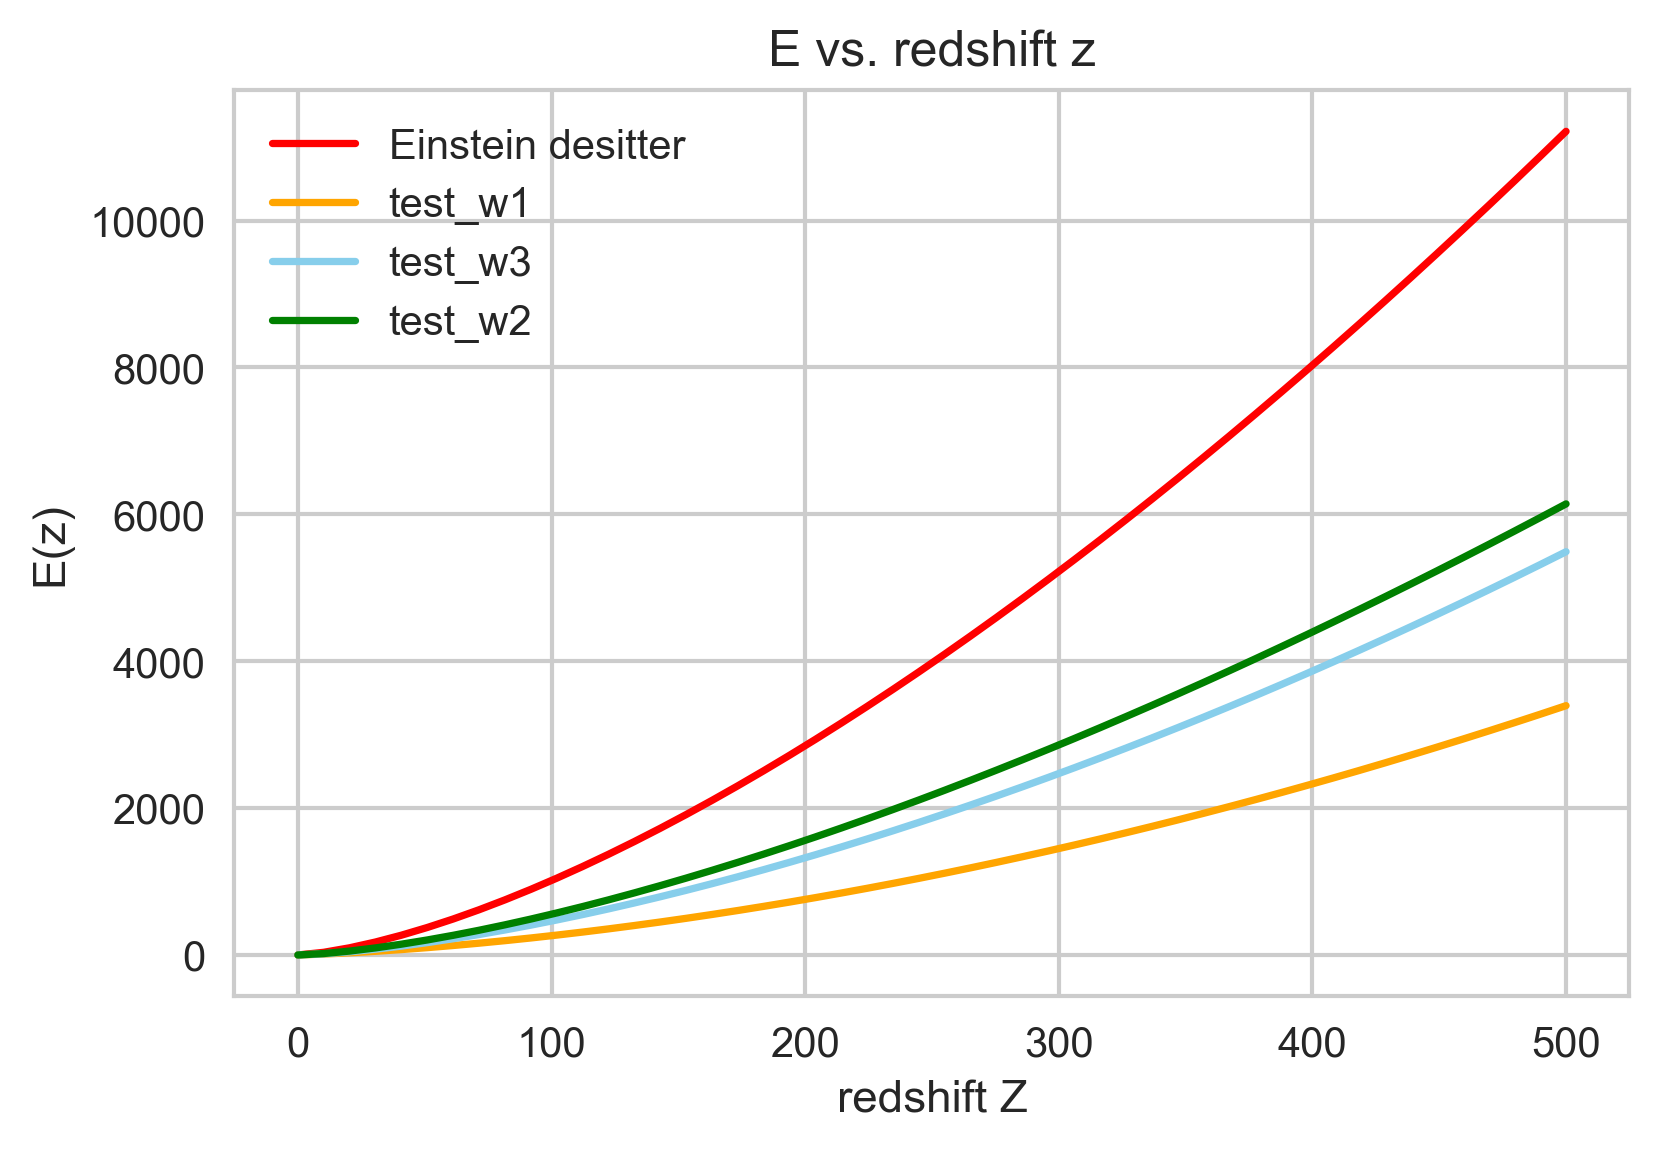

In [1295]:
### Plot E(z) of various models together

z = np.linspace(0,500,50) 

for key in models:
    
    O_matter = models[key][0]
    O_lambder = models[key][1]
    omega = models[key][4]
    NCr = models[key][2]
    NCk = models[key][3]

    Ee = E_of_z(z, O_matter, O_lambder, omega, ho, NCr, NCk)
    if 'High'in key:
        plt.plot(z, Ee,label = 'test_w3', color = 'skyblue')
    if 'Einstein' in key:
        plt.plot(z, Ee, label = 'Einstein desitter', color = 'r')
    if 'test_w2' in key:
        plt.plot(z, Ee, label = 'test_w2', color = 'g')
    if 'Low' in key:
        plt.plot(z, Ee, label = 'test_w1', color = 'orange')
    
plt.legend()
plt.ylabel('E(z)')
plt.xlabel('redshift Z')
plt.title('E vs. redshift z')

/Users/markpoe/astroml_miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


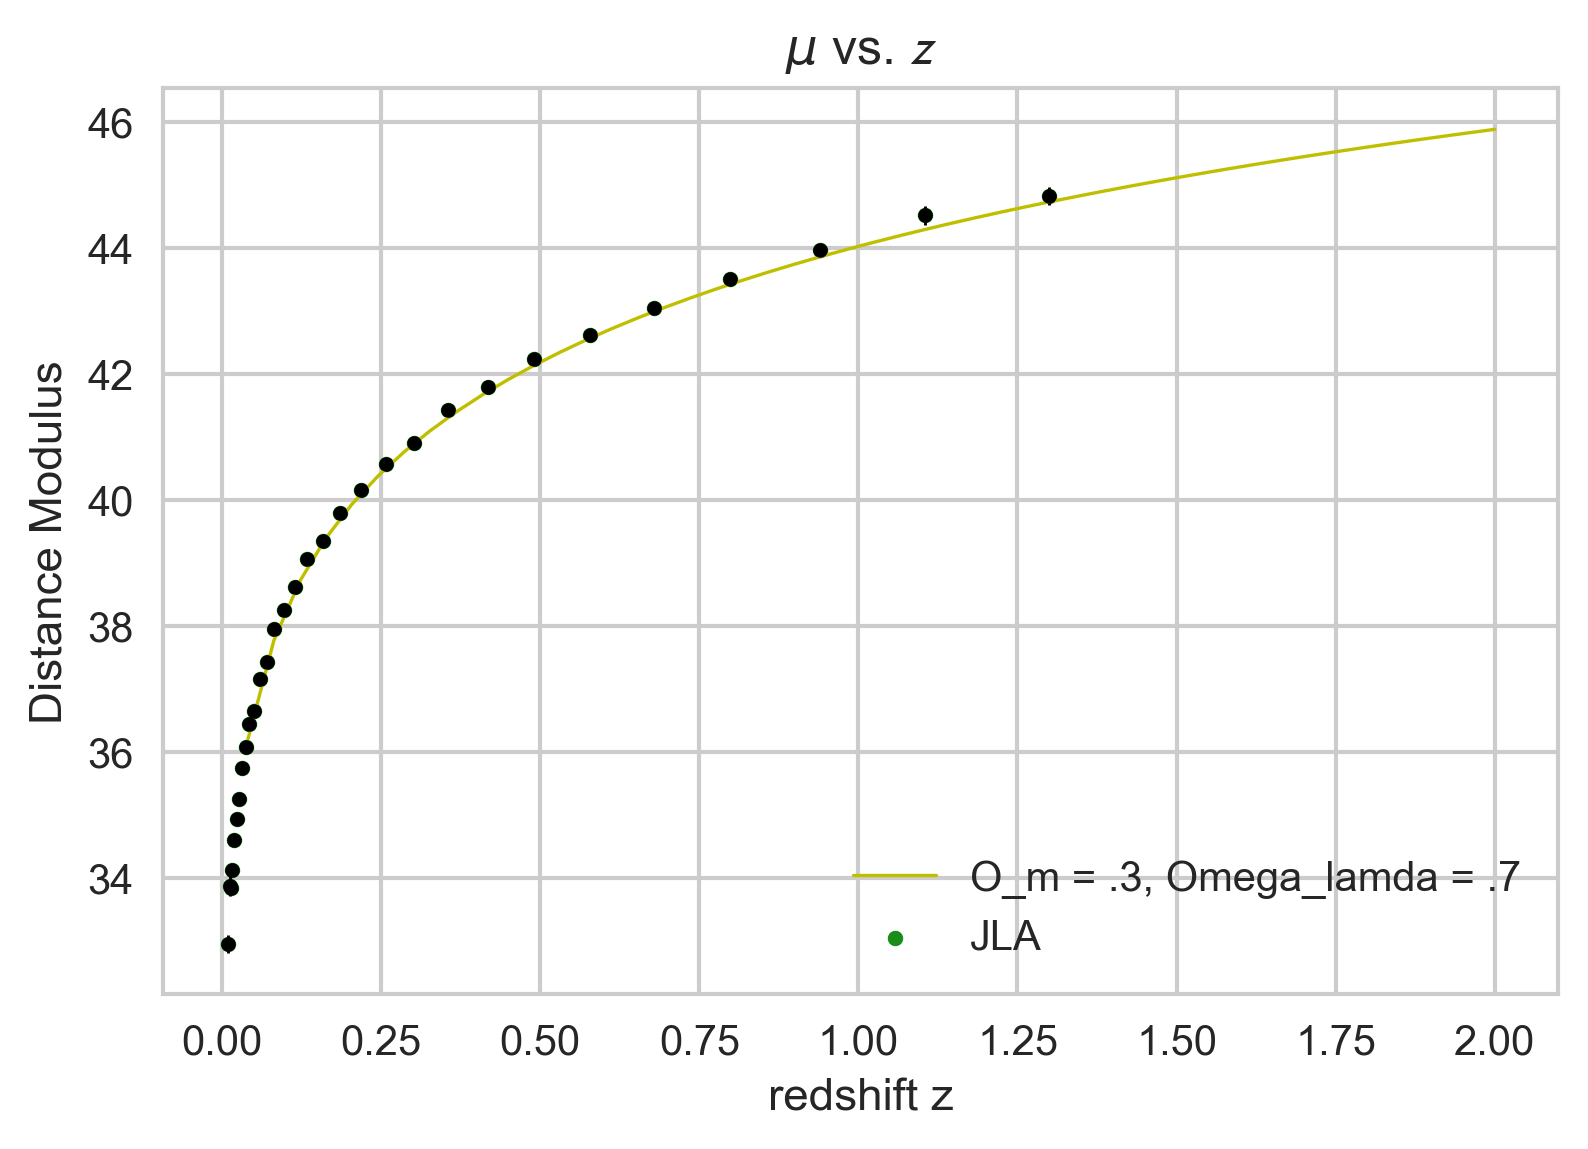

In [234]:
### Plotting luminosity distance OR distance modulus for various models together

log = True
z = np.linspace(0.,2.,50)

for key in models:
    
    model = key
    om = models[key][0]
    ov = models[key][1]
    w = models[key][4]
    NCr = models[key][2]
    NCk = models[key][3]
    
    ld = luminosity_distance(z, om, ov, w, ho, NCr, NCk, log)
    
#     if 'Low'in key:
#         plt.plot(z, ld, label = model, color = 'skyblue')
#     if 'Einstein' in key:
#         plt.plot(z, ld, label = model, color = 'r', linewidth = .8, alpha = .8 )
# #     if 'High ' in key:
# #         plt.plot(z, ld, label = model, color = 'g')
    if 'O_m = .3' in key:
        plt.plot(z, ld, label = model, color = 'y', linewidth = .8, alpha = 1)
#     if 'O_m = .1' in key:
#         plt.plot(z, ld, label = model, color = 'b', linewidth = .8, alpha = .8)
#     if 'test_w1' in key:
#         plt.plot(z, ld, label = model, color = 'black', linewidth = .8, alpha = .8)
#     if 'test_w2' in key:
#         plt.plot(z, ld, label = model, color = 'r', linewidth = .8, alpha = .8)
#     if 'test_w3' in key:
#         plt.plot(z, ld, label = model, color = 'b', linewidth = .8, alpha = .8)
        
## Load observational data
jla = np.loadtxt('jla_mub.txt', usecols = (0,1))

## Plot observational and theoretical data together
plt.scatter(jla[:,0], jla[:,1], color = 'g', label = 'JLA', marker = '.', linewidth = .2, alpha = .9 )
jla_err = np.loadtxt('diag_jla.dat', usecols = (0,1))
plt.errorbar(jla[:,0], jla[:,1], yerr = jla_err[:,1], fmt = '.k', linewidth = .7)
plt.legend()

plt.xlabel('redshift z')
if log:
    plt.ylabel('Distance Modulus')
    plt.title(r'$\mu$' + ' vs. ' + r'$\mathcal{z}$')
else:
    plt.ylabel('Luminosity Distance')
    plt.title('D_L vs. redshift z')
    
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300

In [216]:
!head diag_jla.dat

# z dmu
0.01 0.1458856521663457
0.012 0.16779607458400211
0.014 0.07849893144361902
0.016 0.07235392477654547
0.019 0.08546064347891373
0.023 0.05612508419138452
0.026 0.06106826959690278
0.031 0.05676394193517571
0.037 0.05679556297722561


Text(0.5,1,'D_A vs. redshift z')

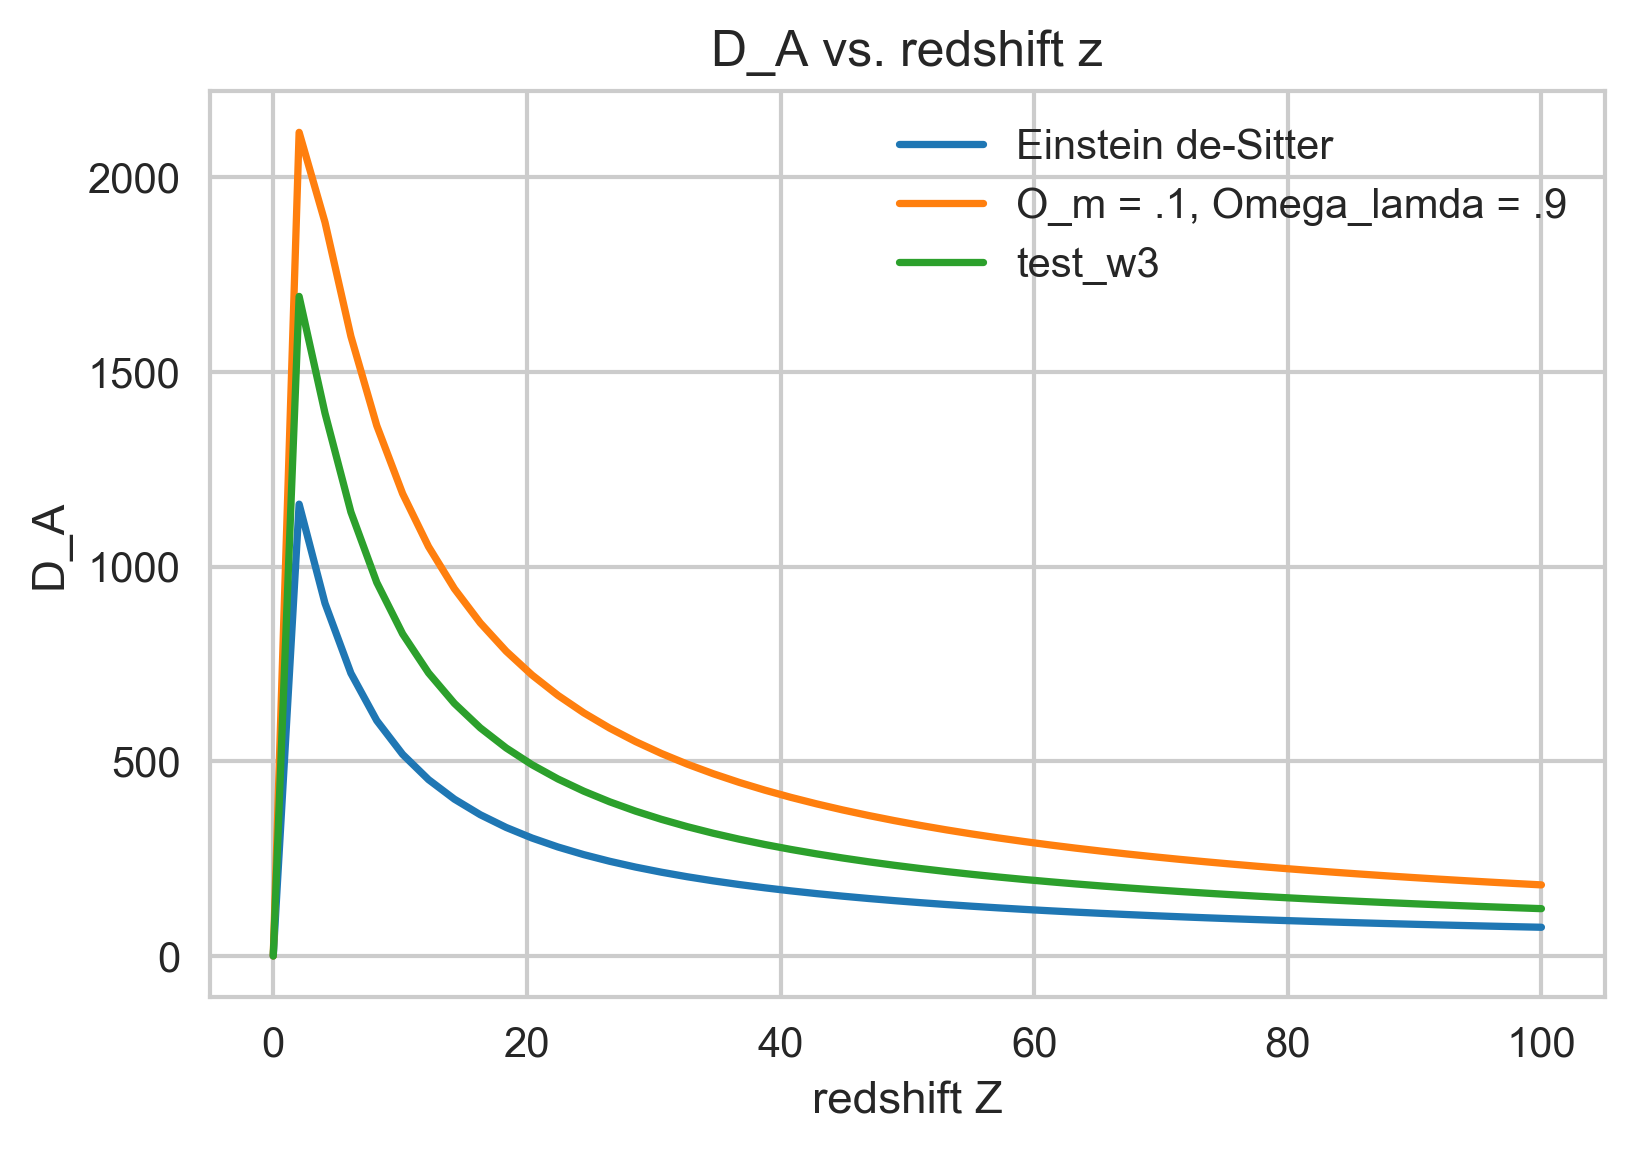

In [1349]:
### Plot Angular-Diameter distance against redshift z

z = np.linspace(0.,100.,50)
log = False

for key in models:
    
    model = key
    O_matter = models[key][0]
    O_lambder = models[key][1]
    omega = models[key][4]
    NCr = models[key][2]
    NCk = models[key][3]
    
    ad = diam_dist(z, O_matter, O_lambder, omega, ho, NCr, NCk, log)
    
    if 'Einstein'in key:
        plt.plot(z, ad, label = model)#, color = 'r', linewidth = 1, alpha = .8)
    if 'O_m = .1' in key: #o
        plt.plot(z, ad, label = model)#, color = 'b', linewidth = 1, alpha = .8)
#     if 'test_w1' in key:
#         plt.plot(z, ad, label = model)#, color = 'y', linewidth = 1, alpha = .8)
#     if 'test_w2' in key:
#         plt.plot(z, ad, label = model)#, color = 'y', linewidth = 1, alpha = .8)
    if 'test_w3' in key:
        plt.plot(z, ad, label = model)#, color = 'y', linewidth = 1, alpha = .8)    
     
    
plt.legend()
    
plt.ylabel('D_A')
plt.xlabel('redshift Z')

plt.title('D_A vs. redshift z')

In [653]:
# mu = luminosity_distance(z=jla[:, 0], om=0.8, ov=0.7, w=-1, ho=72.5, NCr=0., NCk=0., log=True)

In [750]:
# from scipy.stats import chi2
def chi2(om_val, y, df, ho_val = 70.):
    f_x = luminosity_distance(z=jla[:, 0], om=om_val, ov=1- om_val, w=-1, ho=ho_val, NCr=0., NCk=0., log=True)
    func = (((y - f_x)**2)/(df**2))
    return func.sum()

In [749]:
ll = []
o = []
for i in np.arange(0,1,.05):
    ch = chi2(i,jla[:,1],jla_err[:,1])
    ll.append(ch)
    o.append(round(i,2))
    
l = []
m = []
for i in np.arange(0,1,.1):
    ch = chi2(i,jla[:,1],jla_err[:,1])
    mu = luminosity_distance(z=jla[:, 0], om=i, ov=1- i, w=-1, ho=70., NCr=0., NCk=0., log=True)
    l.append(ch)
    m.append(mu)
    
print (len(m))
print (m)
# print (len(ll))
# print (len(oo))
# print (ll)
# print (o)

10
[array([33.18022018, 33.58042211, 33.91944327, 34.21368177, 34.59325224,
       35.01663066, 35.28921686, 35.68171511, 36.07851572, 36.41737713,
       36.80447778, 37.17589889, 37.5310224 , 37.89881888, 38.29350512,
       38.67756353, 39.06720258, 39.47044155, 39.87660148, 40.27913222,
       40.70495532, 41.13170295, 41.56945156, 42.02287588, 42.48140899,
       42.9587875 , 43.44321567, 43.94650303, 44.46326123, 44.99168521,
       45.53696926]), array([33.17858255, 33.57845478, 33.91714553, 34.21105289, 34.5901253 ,
       35.01283711, 35.28492145, 35.67657967, 36.07236626, 36.41020717,
       36.79593701, 37.16580216, 37.51917966, 37.88485711, 38.27685805,
       38.65782414, 39.0437587 , 39.4424577 , 39.84319121, 40.23935026,
       40.65716487, 41.07434456, 41.50038273, 41.93928188, 42.38019152,
       42.83551054, 43.29298691, 43.76255282, 44.23763064, 44.71494624,
       45.19735258]), array([33.17694862, 33.5764928 , 33.91485508, 34.20843355, 34.58701186,
       35.009063

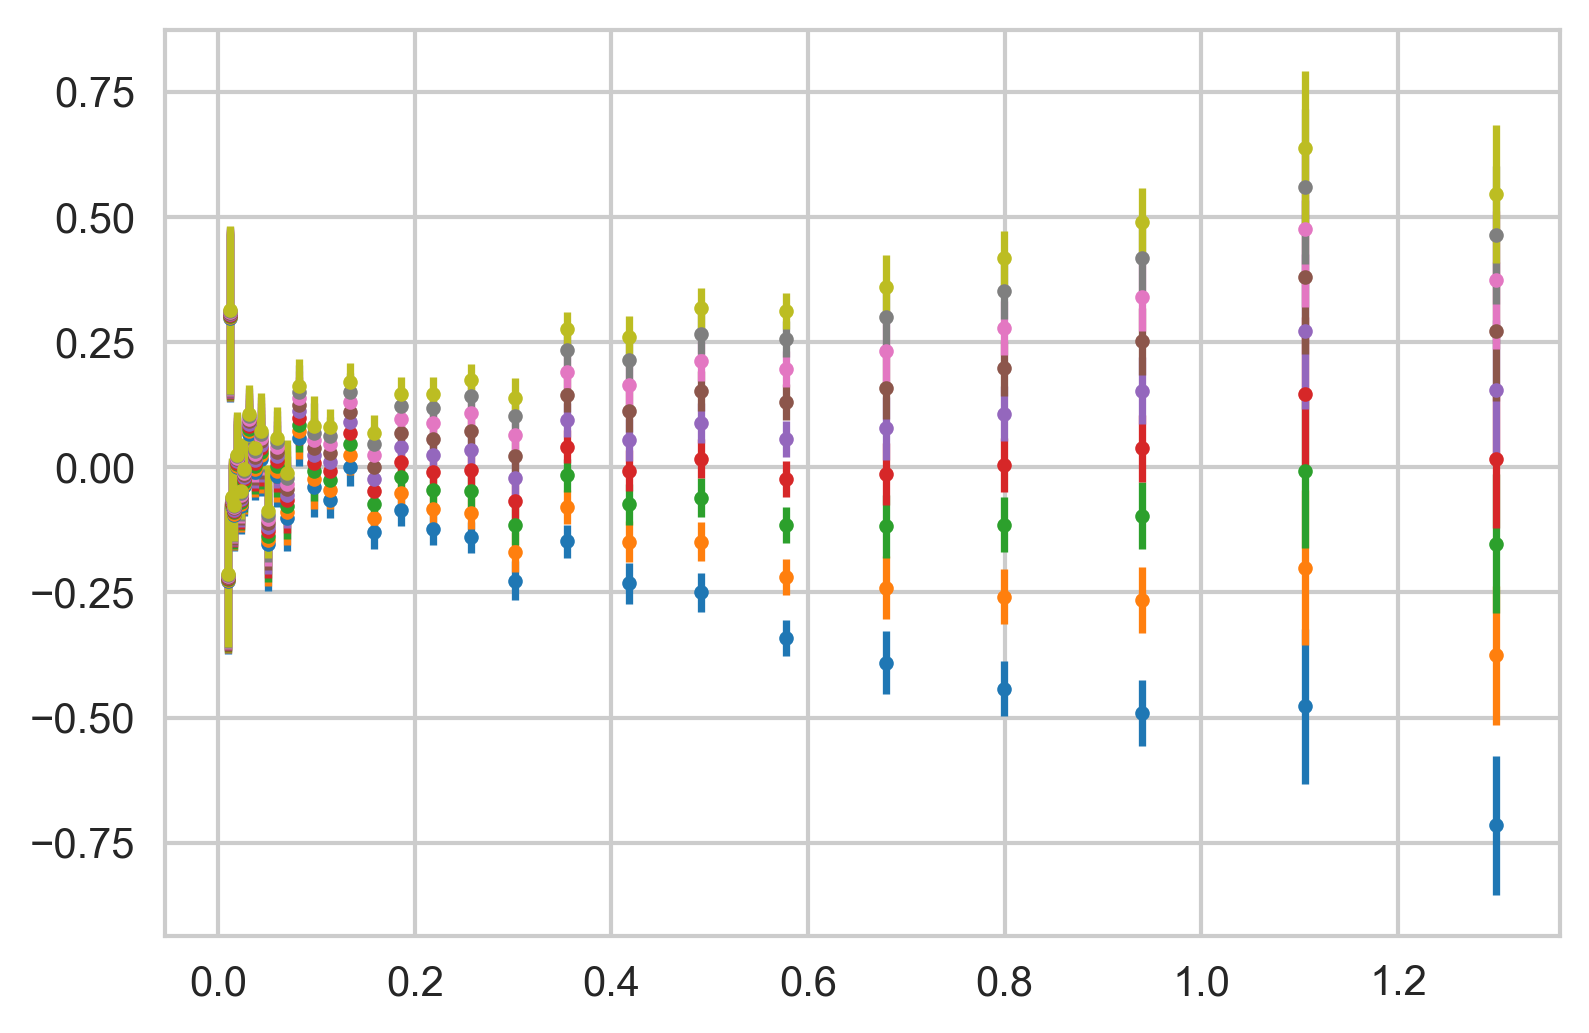

In [767]:
for i in m[0:9]:    
    plt.errorbar(jla[:,0],jla[:,1] - i, yerr=jla_err[:,1], fmt='.')

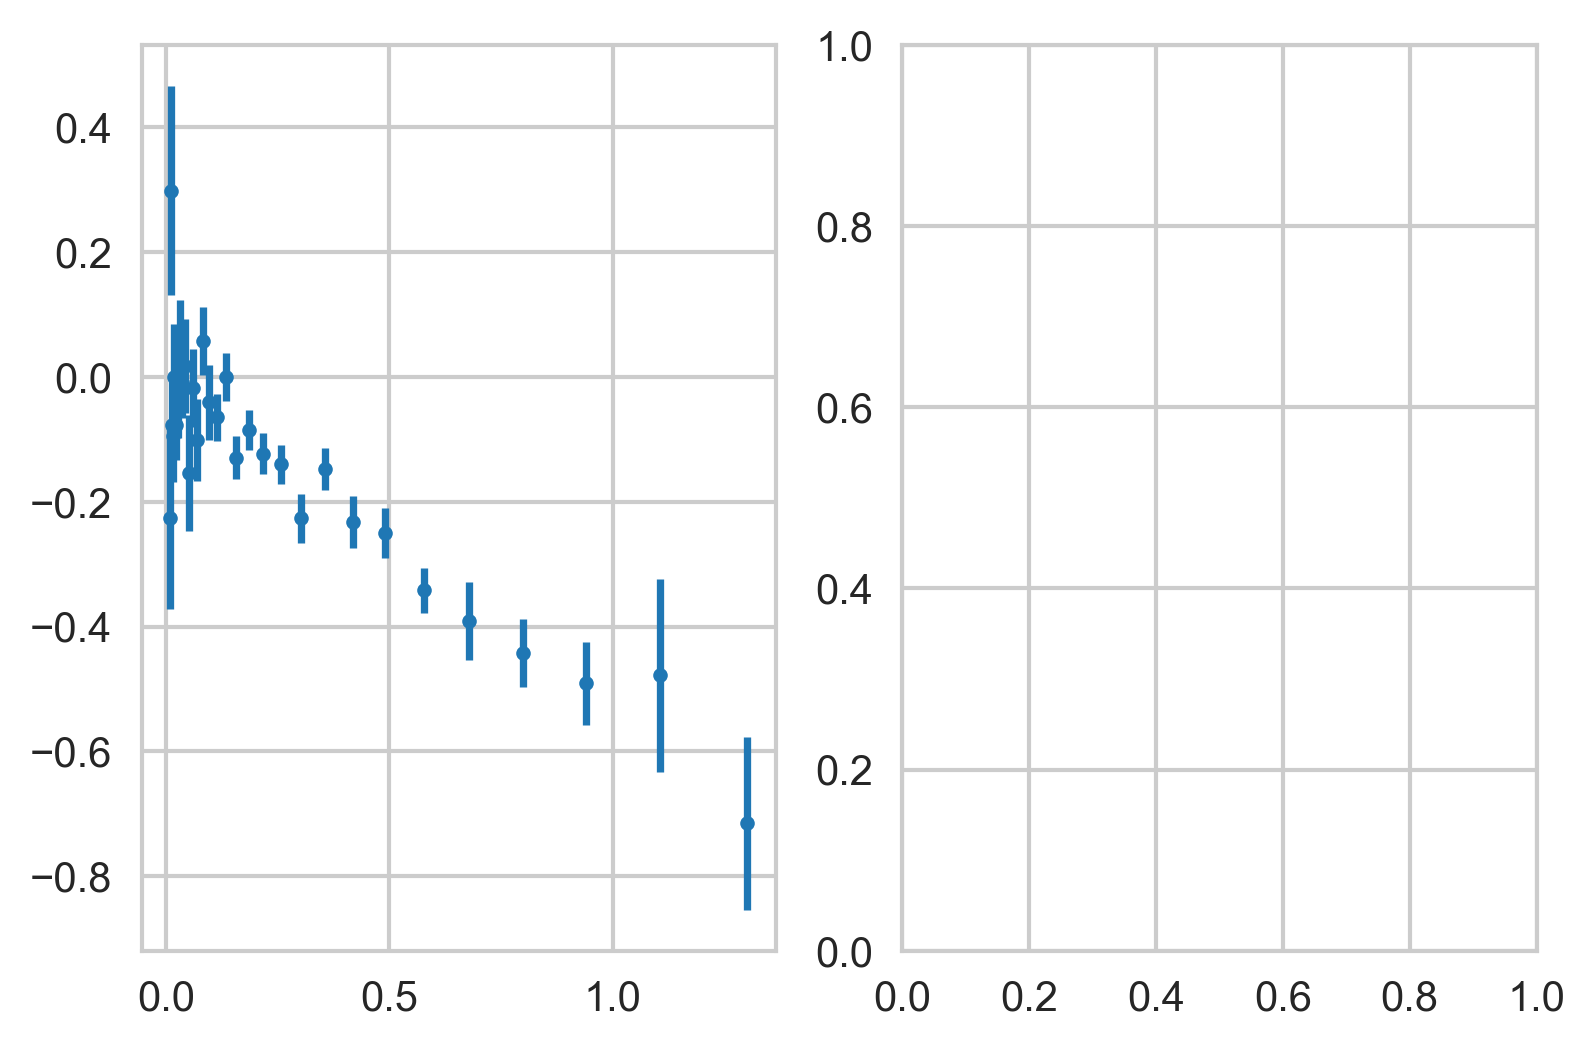

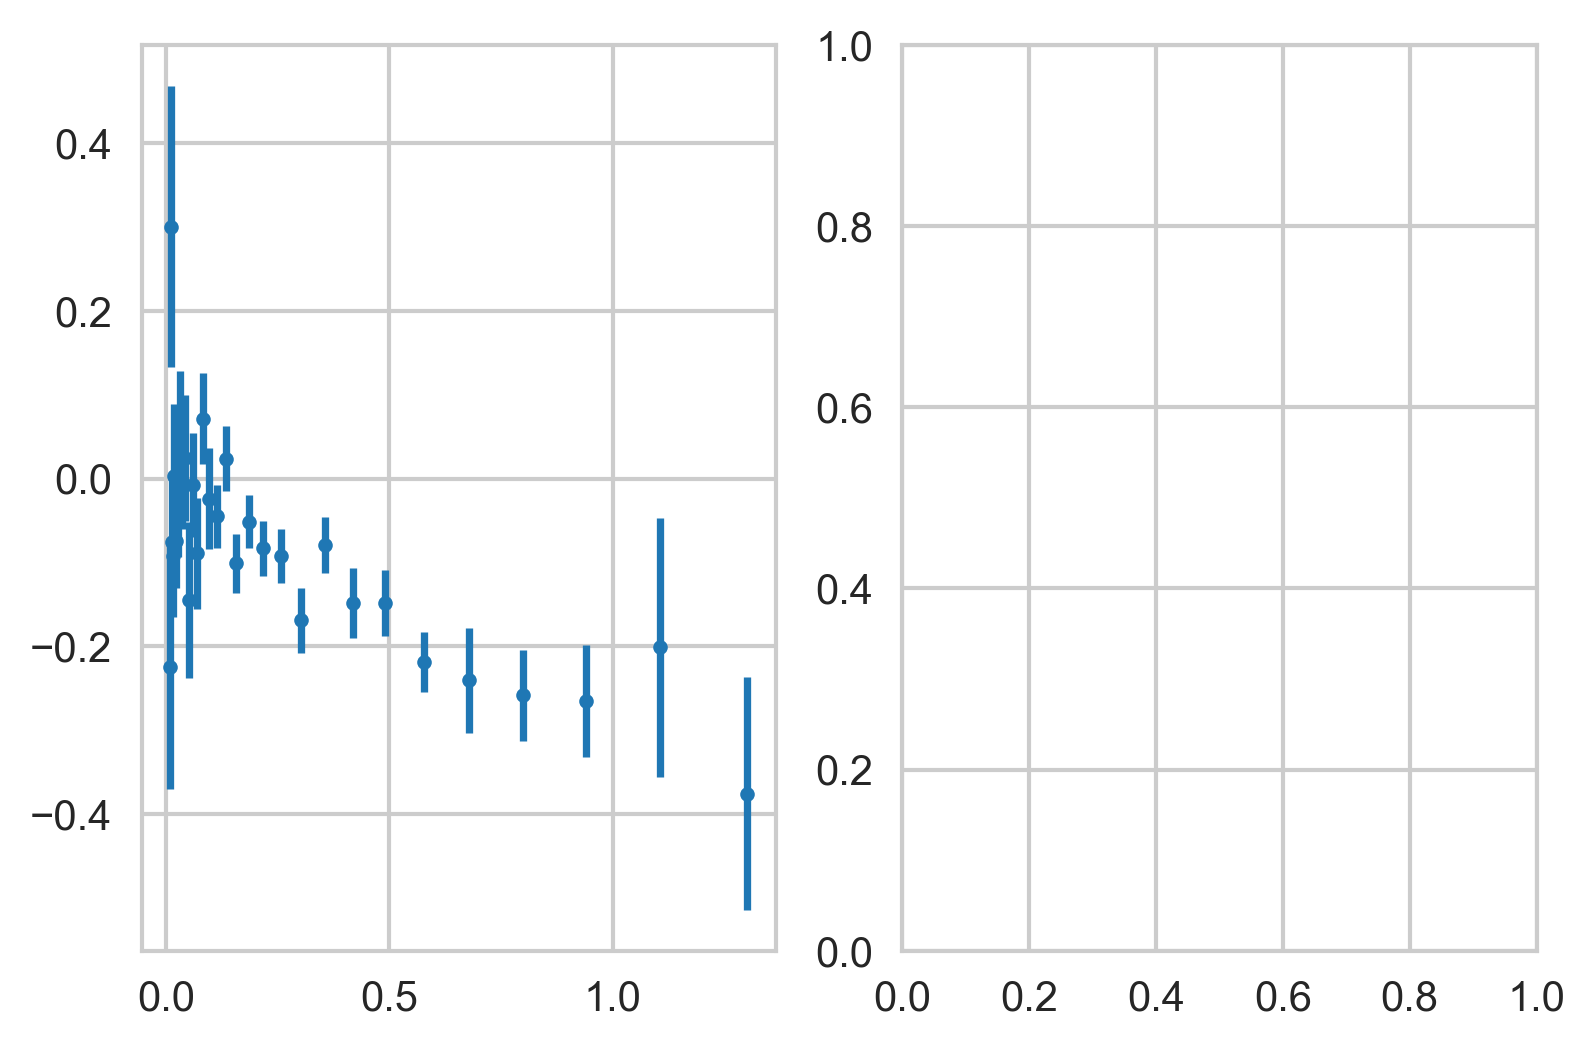

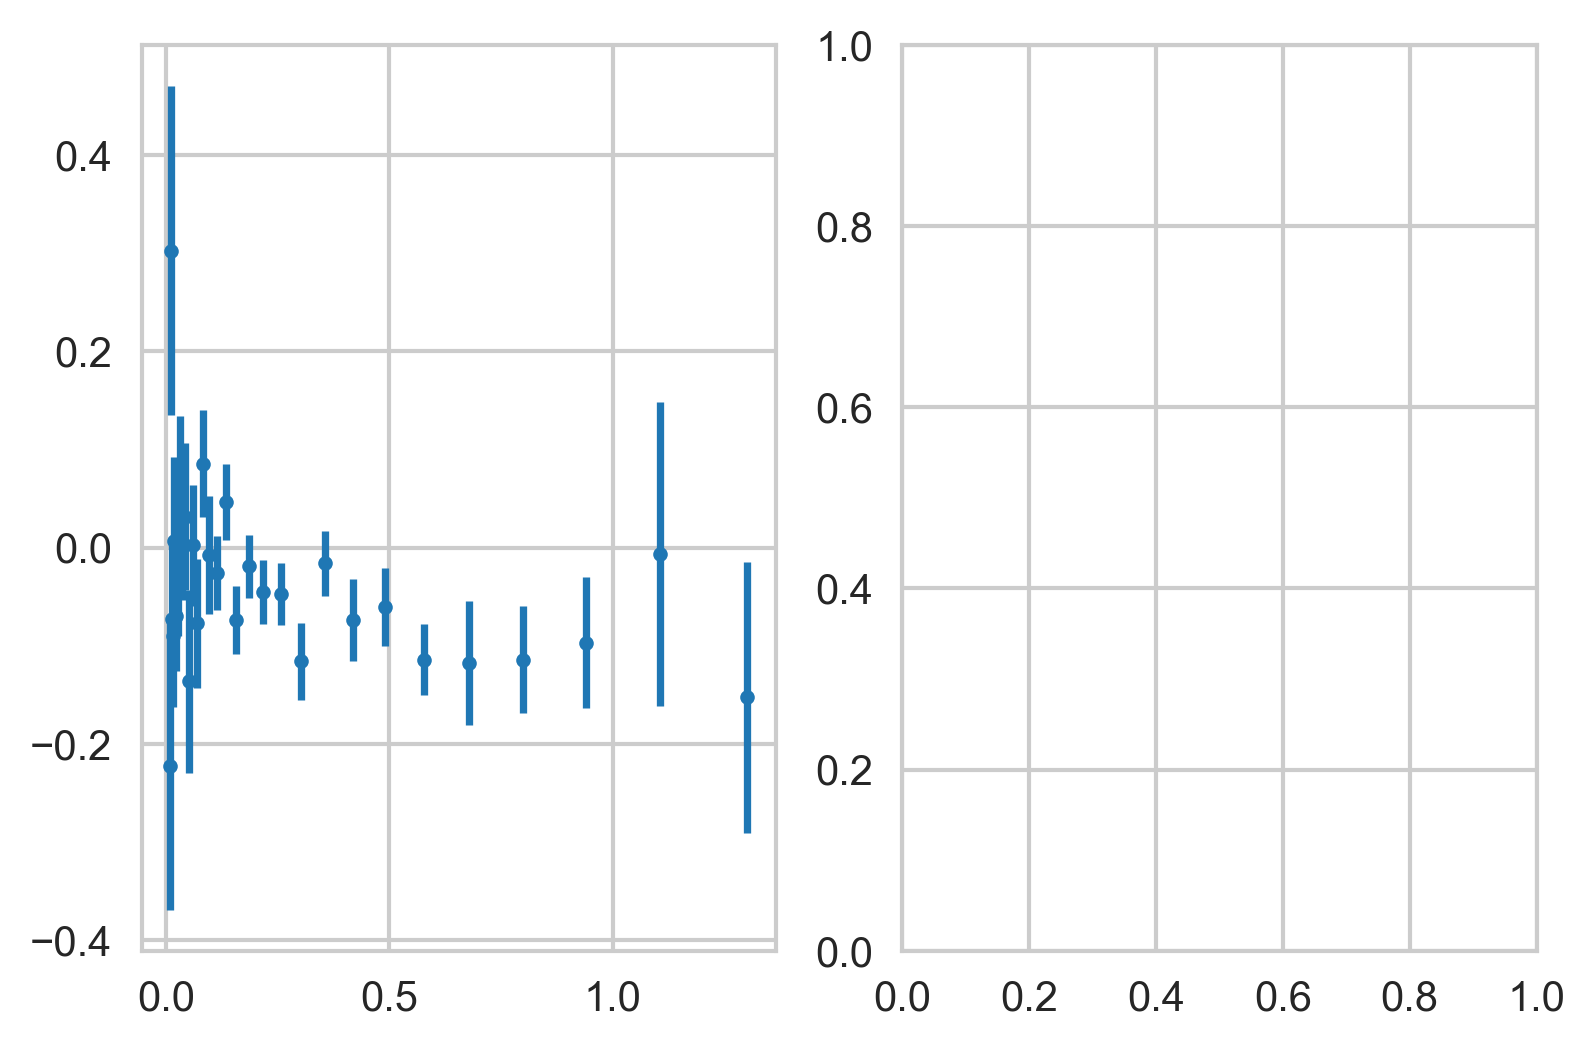

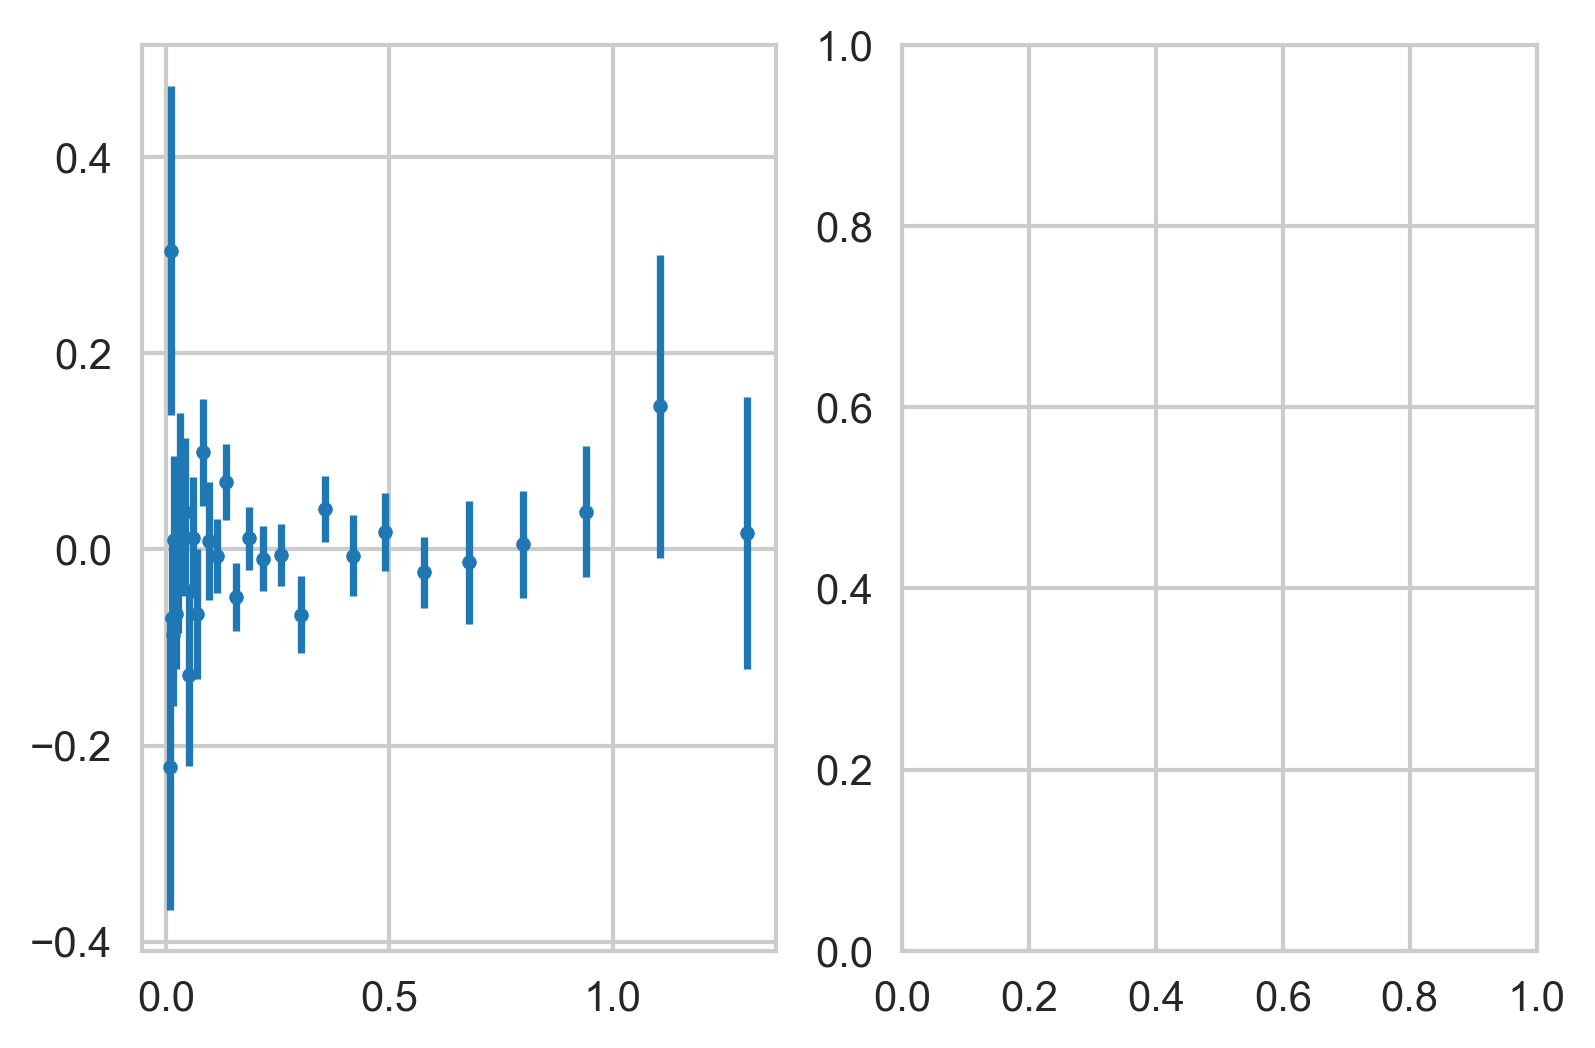

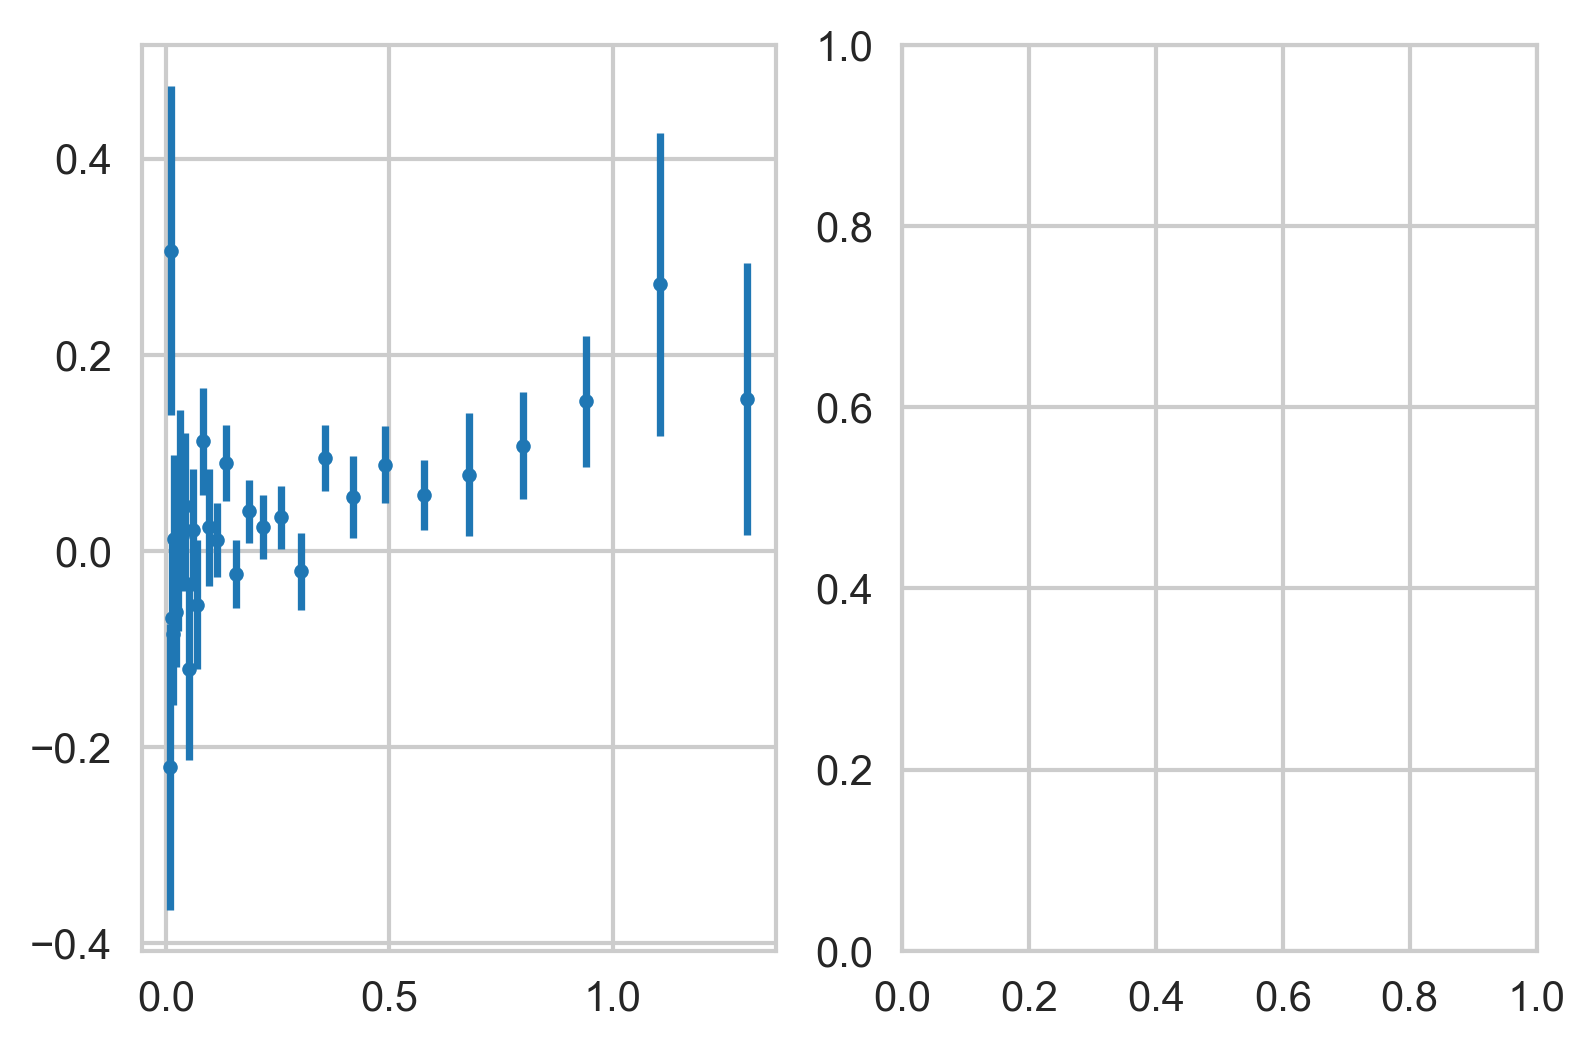

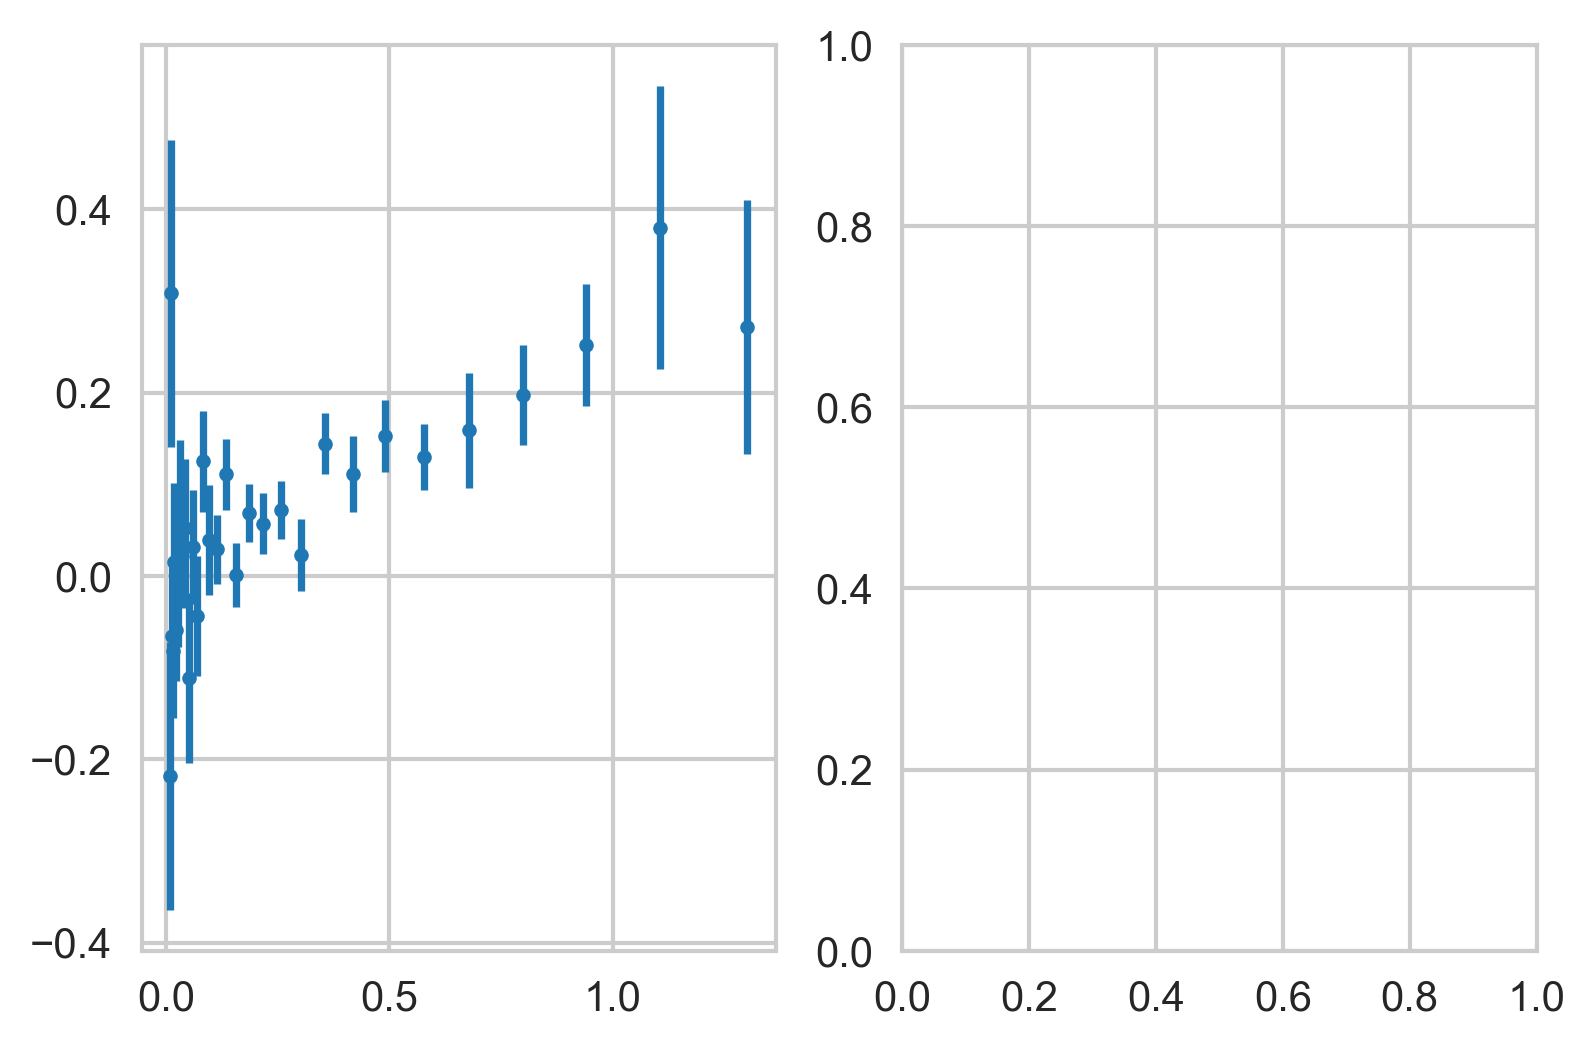

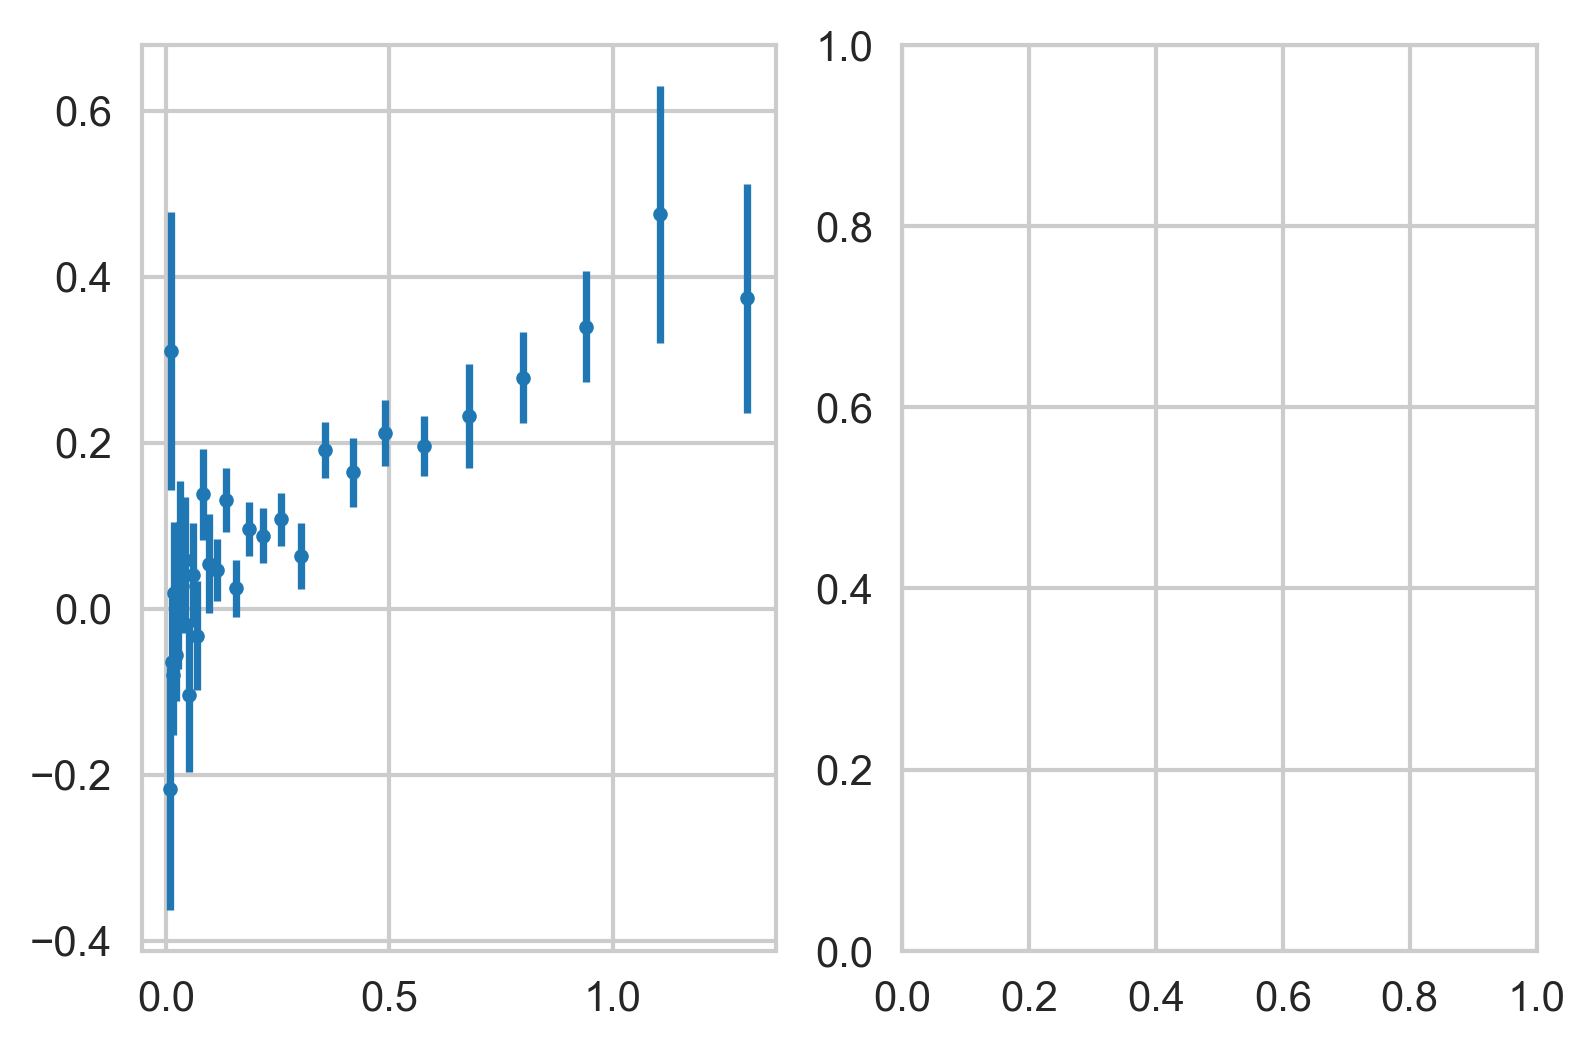

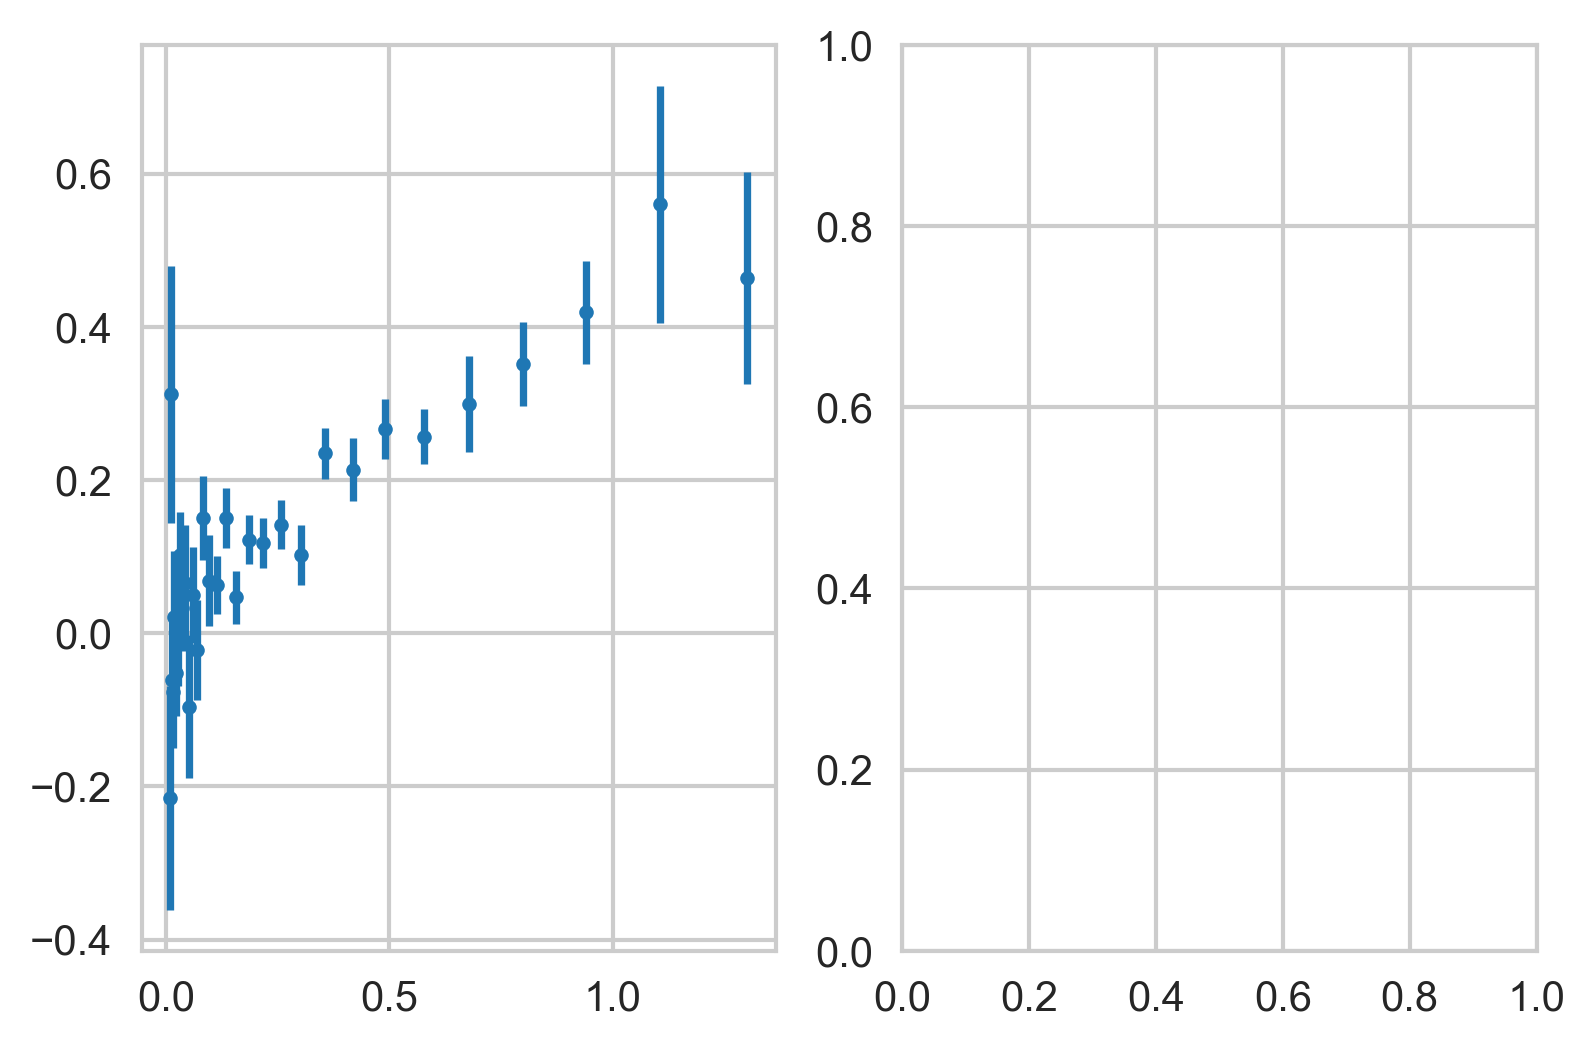

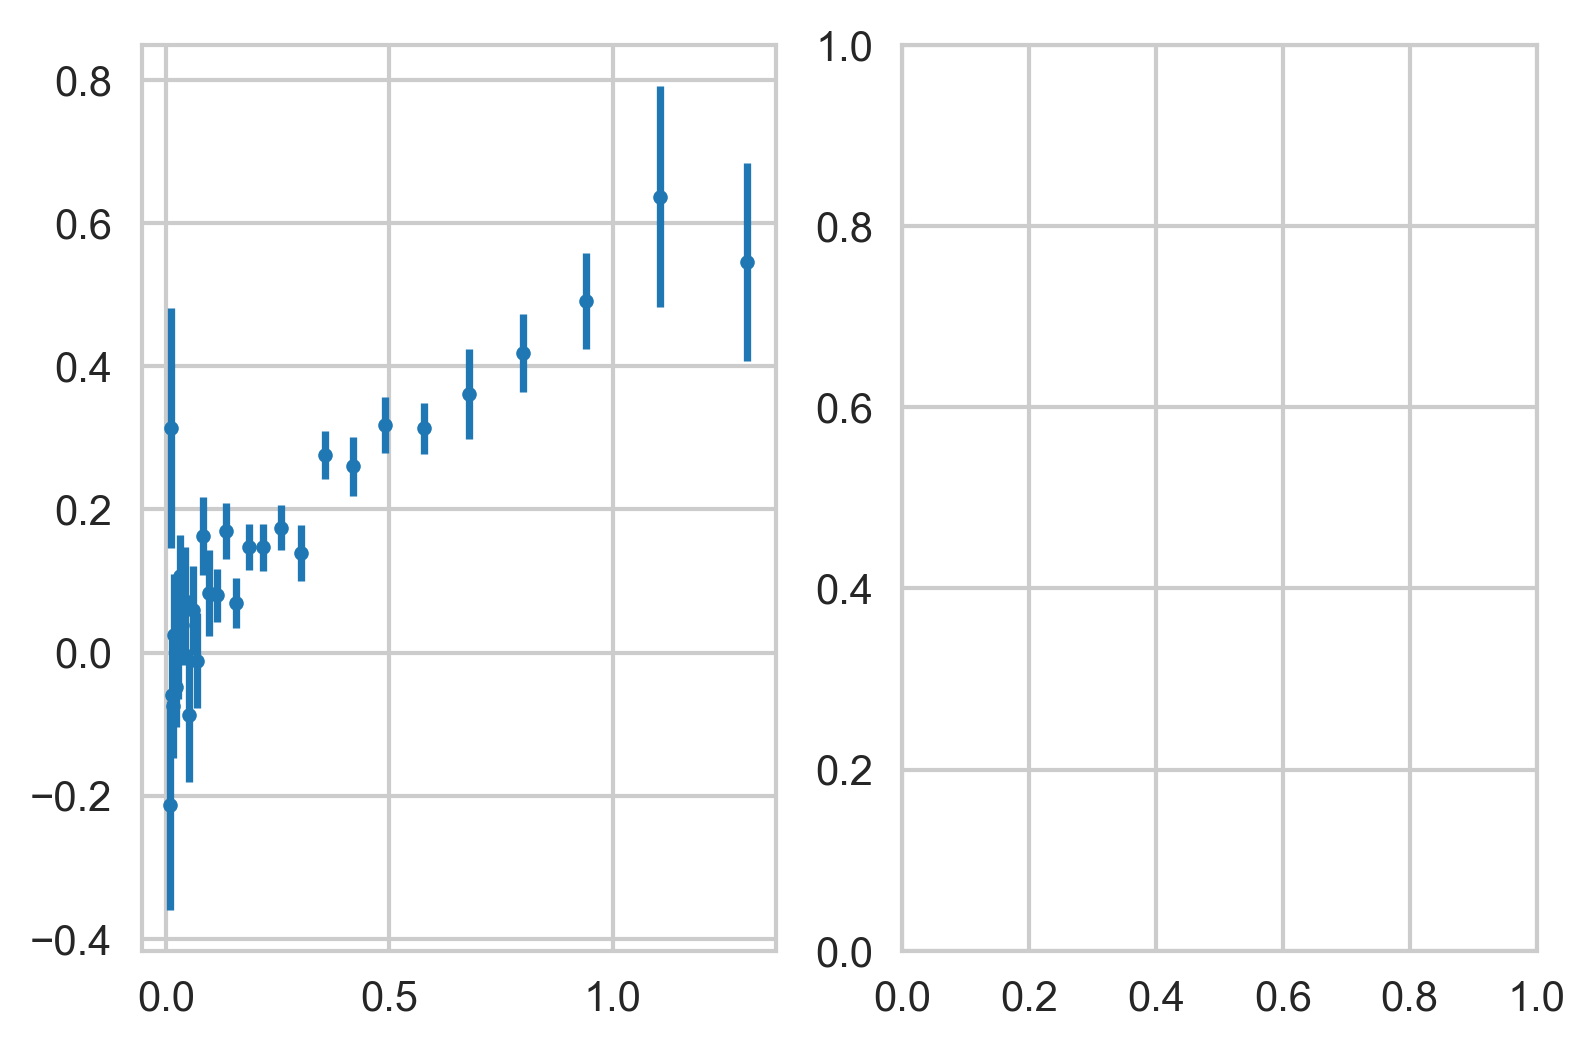

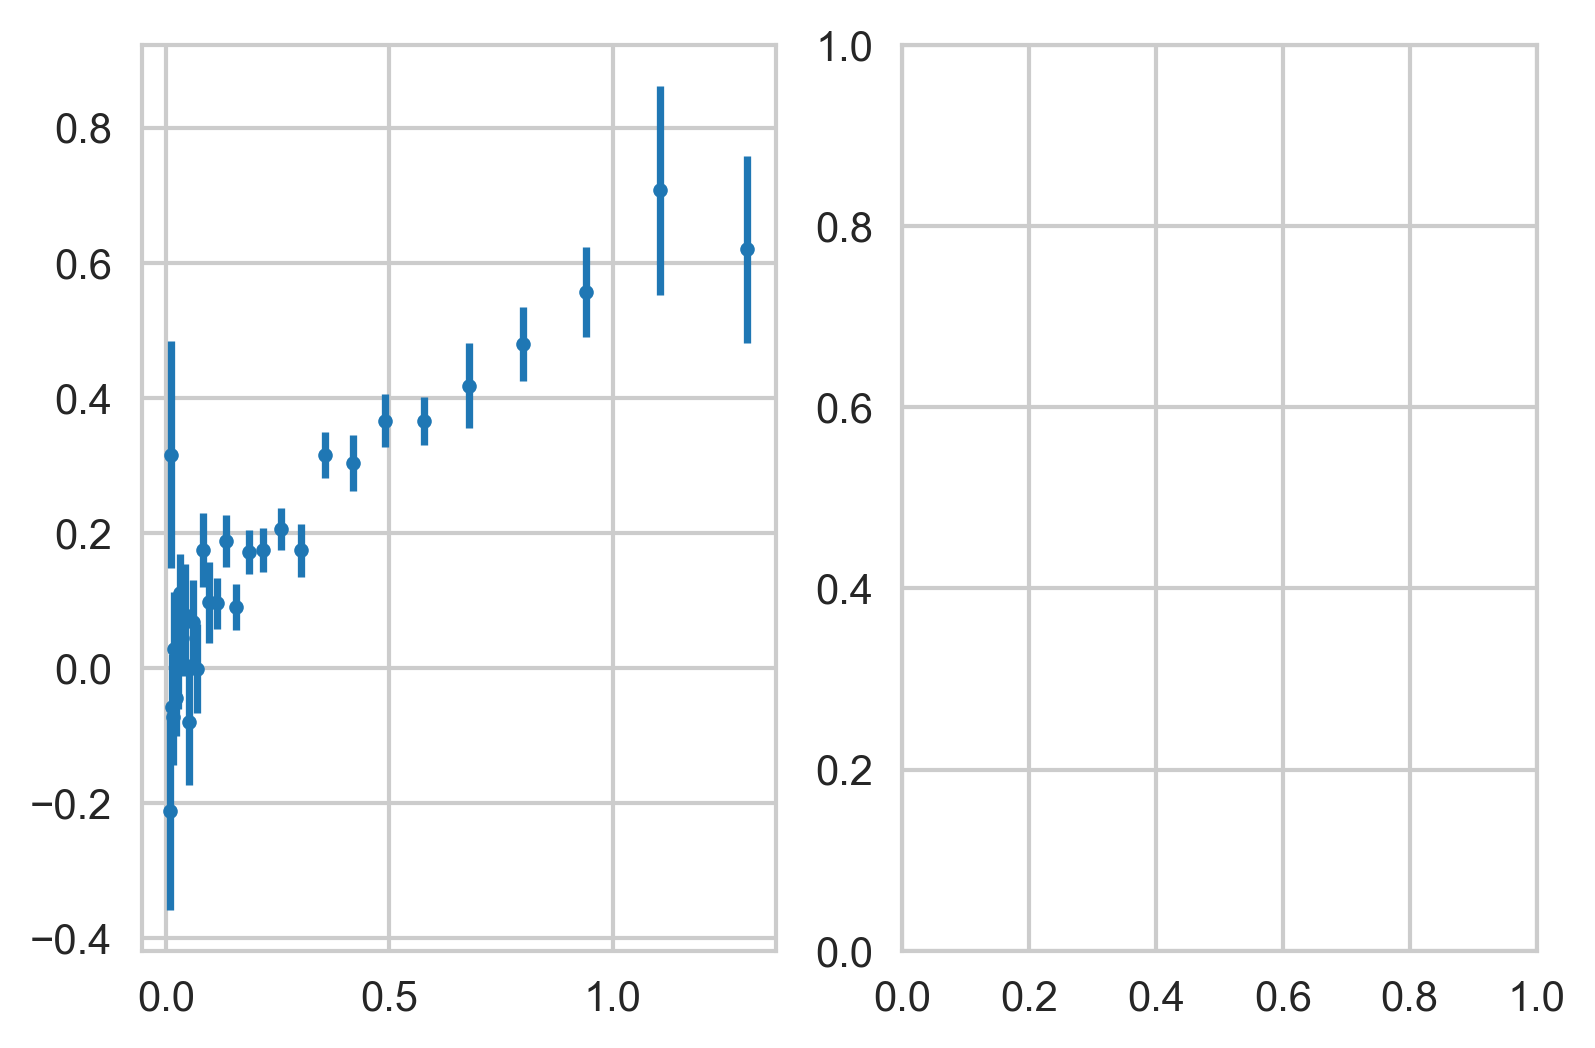

In [805]:
for i in m:    
    fig, axx = plt.subplots(1,2)
    ax = axx[0]
    ax.errorbar(jla[:,0],jla[:,1] - i, yerr=jla_err[:,1], fmt='.')
#     ax = axx[1]
#     ax.errorbar(jla[:,0],jla[:,1] - j, yerr=jla_err[:,1], fmt='.')
#     ax = axx[2]
#     ax.errorbar(jla[:,0],jla[:,1] - i , yerr=jla_err[:,1], fmt='.')

In [705]:
# ch0 = chi2(.3, jla[:,1] ,jla_err[:,1])
# ch1 = chi2(.1,)

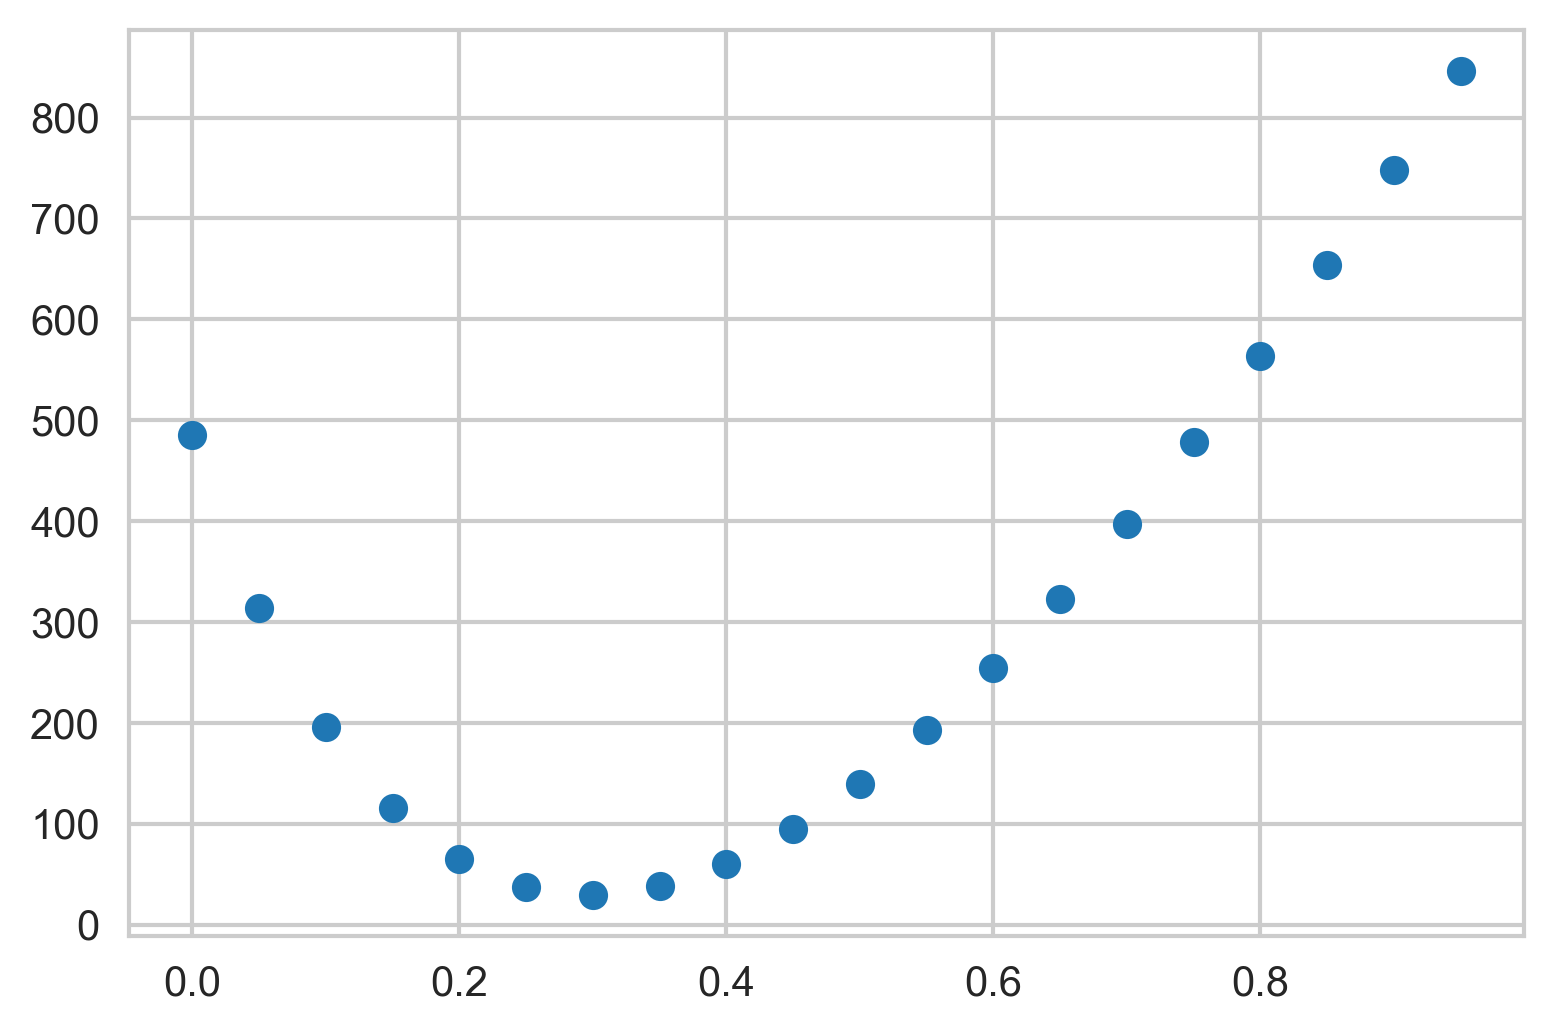

In [806]:
plt.plot(o,ll,'o')
# plt.errorbar(o, ll, yerr=jla_err[:,1], fmt='None')

<ErrorbarContainer object of 3 artists>

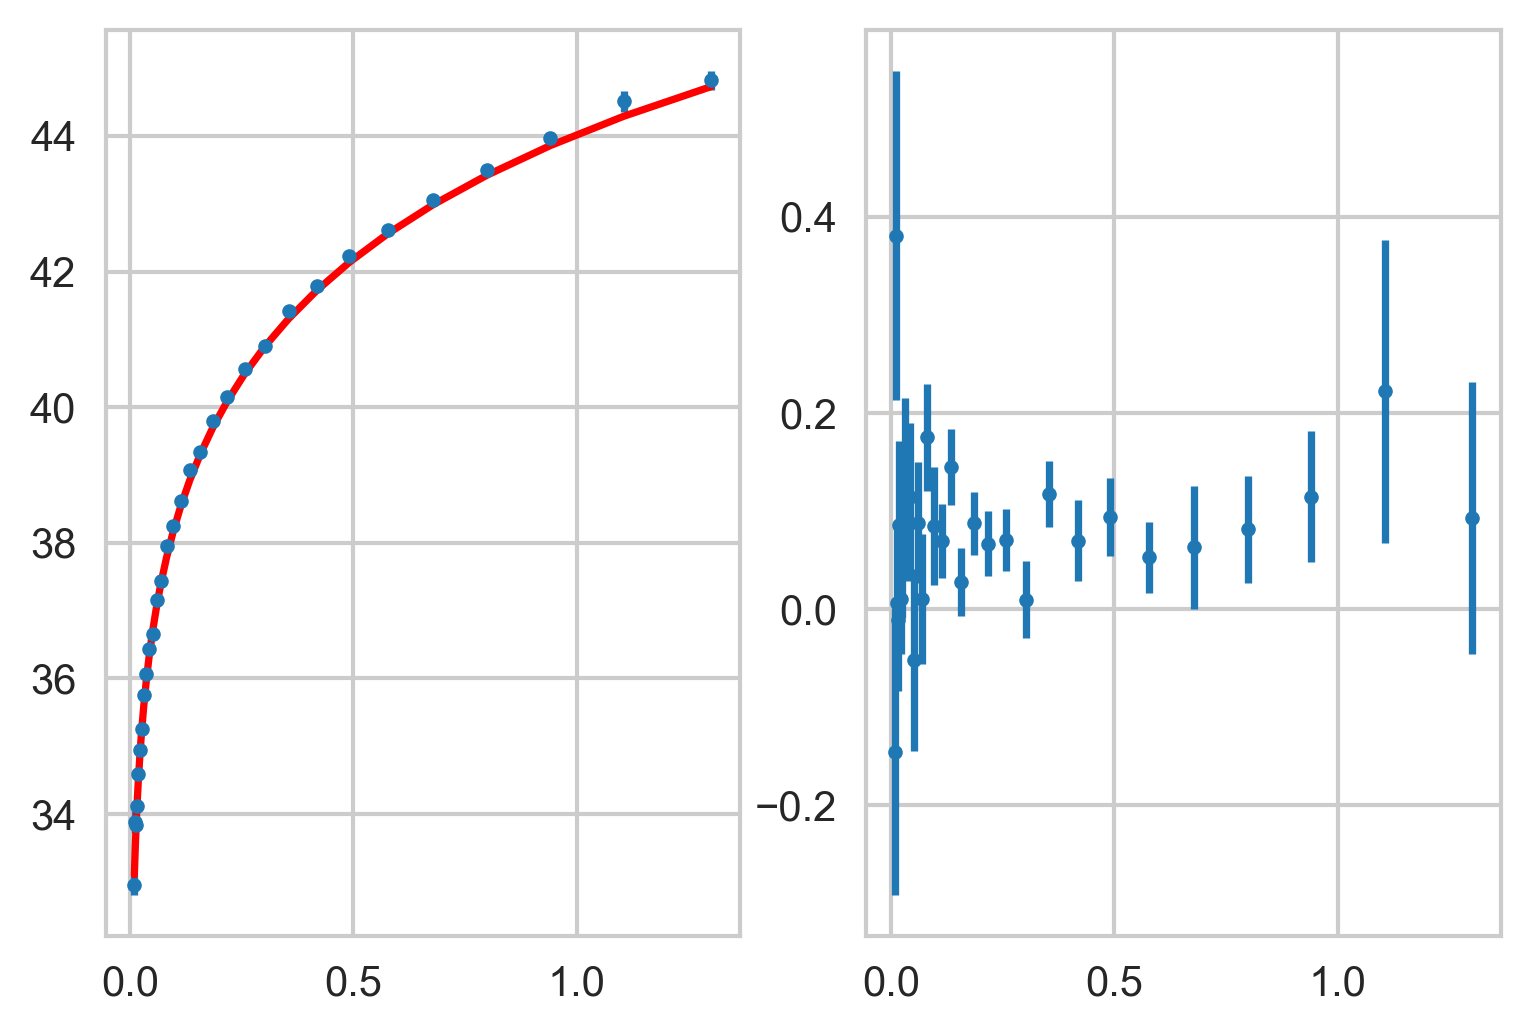

In [448]:
fig, axx = plt.subplots(1,2)
ax = axx[0]
ax.errorbar(jla[:, 0], jla[:, 1], yerr=jla_err[:, 1], fmt='.')
ax.plot(jla[:, 0], mu, '-r')
ax = axx[1]
ax.errorbar(jla[:, 0], jla[:, 1] - mu, yerr=jla_err[:, 1], fmt='.')

In [740]:
# chi(jla[:, 1], mu, jla_err[:, 1]).sum()

In [501]:
def chi2_params(jla, Om, H0, jla_err):
    Om = np.ravel(Om)
    #ov should be calculated ... not Correct here 
    mu = np.array(list(luminosity_distance(z=jla[:, 0], om=x, ov=0.7, w=-1, ho=H0, NCr=0., NCk=0., log=True) for x in Om))
    return list(chi(jla[:, 1], xx, jla_err[:, 1]).sum() for xx in mu)

In [502]:
chi2_params(jla, [0.1, 0.3, 0.7], 72.5, jla_err)

[829.2897147039275, 101.2130069843406, 3431.818928376439]

In [482]:
jla.shape

(31, 2)

In [483]:
jla_err.shape

(31, 2)

In [456]:
np.ravel([0.2, 0.3])

array([0.2, 0.3])

In [470]:
luminosity_distance(z=jla[:, 0], om=0.2, ov=0.7, w=-1, ho=72.5, NCr=0., NCk=0., log=True)

array([33.21477992, 33.61425142, 33.95254097, 34.24604666, 34.62451569,
       35.04642139, 35.31789994, 35.70854624, 36.10311485, 36.43973381,
       36.82382834, 37.19184568, 37.54316028, 37.90634909, 38.29521983,
       38.67261356, 39.05431363, 39.44788943, 39.84259382, 40.23180245,
       40.64107426, 41.04832161, 41.46259461, 41.88747186, 42.31216943,
       42.74834488, 43.18401492, 43.62848787, 44.07548628, 44.52213653,
       44.97152233])

In [ ]:
luminosity_distance((z=jla[:, 0], om=0.2, ov=0.7, w=-1, ho=72.5, NCr=0., NCk=0., log=True))